# IMPORT PACKAGES & READ DATA

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle

In [110]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [111]:
# Show all ROWS in the output:
pd.set_option('display.max_rows', None)

# Show all COLUMNS in the output:
pd.set_option('display.max_columns', None)

In [112]:
df = pd.read_csv('df_cleaned_p2.csv')

In [113]:
with open("all_feature_lists_v2", "rb") as fp:
    id_features, \
    cont_features, \
    cat_features, \
    global_flavor_features, \
    f_columns_g, \
    n_columns_g, \
    t_columns_g, \
    complexity_features, \
    missing_features_CAT, \
    missing_features_CONT, \
    missing_features_ALL = pickle.load(fp)


In [114]:
df.head()

Unnamed: 0              product_title  distillery         country  \
0           0   Glen Moray Elgin Classic  Glen Moray        Scotland   
1           1         Tobermory 21 Years   Tobermory        Scotland   
2           2                 Cutty Sark     unknown             NaN   
3           3  Crown Royal 3 Years Black       Gimli          Canada   
4           4  Gold Cock 20 Years - 1995  R. Jelinek  Czech Republic   

     region   age   abv  bottle_size            bottler maturing  rating  \
0  Speyside   NaN  40.0          0.7  Original bottling      NaN     3.4   
1   Islands  21.0  53.8          0.7  Original bottling  Bourbon     4.6   
2       NaN   NaN  40.0          0.7  Original bottling      NaN     3.7   
3       NaN   3.0  45.0          1.0  Original bottling      NaN     3.4   
4       NaN  20.0  49.2          0.7  Original bottling      NaN     4.0   

   nbr_of_ratings                     unique_id     filtration  colouring  \
0              24    1_Glen Moray Elgin Classic     Filtration  Colouring   
1               5          5_Tobermory 21 Years  No filtration        NaN   
2              10                 13_Cutty Sark  No filtration  Colouring   
3               8  15_Crown Royal 3 Years Black     Filtration  Colouring   
4               1  16_Gold Cock 20 Years - 1995            NaN        NaN   

   whisky_type  f_Spices_g  f_Sweet_g  f_Malt_g  f_Pepper_g  f_Oak_g  \
0  Single Malt      0.5059     2.3293    2.0943      1.7707   0.2346   
1      Unknown      3.5041     0.4609    0.5685      0.5493   0.5075   
2      Blended      2.8583     0.6683    0.4120      0.7964   3.3112   
3      Blended      0.0000     0.8145    0.0000      0.0000   0.7384   
4      Unknown      0.0000     0.0000    0.0000      0.0000   0.0000   

   f_Black Currant_g  f_Fruit_g  f_Ginger_g  f_Caramel_g  f_Honey_g  f_Nuts_g  \
0             0.5536     0.2529      0.2647       0.2618     0.2677    0.2618   
1             0.0000     0.5493      0.0000       0.0000     0.0000    0.0000   
2             0.0000     0.0000      0.4167       0.0000     0.0000    0.0000   
3             0.0000     0.7960      0.0000       0.0000     0.0000    0.0000   
4             0.0000     0.0000      0.0000       0.0000     0.0000    0.0000   

   f_Oil_g  f_Zitrus_g  f_Herb_g  f_Dark Chocolate_g  f_Coffee_g  f_Grape_g  \
0   0.2647      0.2677    0.0000              0.0000      0.0000     0.0000   
1   0.0000      2.8743    1.7052              1.1497      1.1497     0.5749   
2   0.0000      0.4167    0.4120              0.0000      0.0000     0.0000   
3   0.0000      0.8427    0.8332              0.0000      0.0000     0.0000   
4   0.0000      0.0000    0.0000              0.0000      0.0000     0.0000   

   f_Chocolate_g  f_Peat Smoke_g  f_Vanilla_g  f_Orange_g  f_Sherry_g  \
0         0.0000          0.0000        0.000      0.0000      0.0000   
1         0.5685          0.0000        0.000      0.0000      0.0000   
2         0.0000          0.8279        0.412      0.4214      0.3758   
3         0.8238          0.0000        0.000      0.8427      0.7515   
4         0.0000          0.0000        0.000      0.0000      0.0000   

   f_Cake_g  f_Floral_g  f_Raisin_g  f_Herbs_g  f_Wheat_g  f_Chili_g  \
0    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
1    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
2    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
3    0.8427      0.8427      0.8332     0.8145        0.0        0.0   
4    0.0000      0.0000      0.0000     0.0000        0.0        0.0   

   f_Salt_g  f_Tobacco_g  f_Maritime Notes_g  f_Bonfire Smoke_g  f_Alcohol_g  \
0       0.0          0.0                 0.0                0.0          0.0   
1       0.0          0.0                 0.0                0.0          0.0   
2       0.0          0.0                 0.0                0.0          0.0   
3       0.0          0.0                 0.0                0.0

In [115]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [116]:
df.head()

product_title  distillery         country    region   age  \
0   Glen Moray Elgin Classic  Glen Moray        Scotland  Speyside   NaN   
1         Tobermory 21 Years   Tobermory        Scotland   Islands  21.0   
2                 Cutty Sark     unknown             NaN       NaN   NaN   
3  Crown Royal 3 Years Black       Gimli          Canada       NaN   3.0   
4  Gold Cock 20 Years - 1995  R. Jelinek  Czech Republic       NaN  20.0   

    abv  bottle_size            bottler maturing  rating  nbr_of_ratings  \
0  40.0          0.7  Original bottling      NaN     3.4              24   
1  53.8          0.7  Original bottling  Bourbon     4.6               5   
2  40.0          0.7  Original bottling      NaN     3.7              10   
3  45.0          1.0  Original bottling      NaN     3.4               8   
4  49.2          0.7  Original bottling      NaN     4.0               1   

                      unique_id     filtration  colouring  whisky_type  \
0    1_Glen Moray Elgin Classic     Filtration  Colouring  Single Malt   
1          5_Tobermory 21 Years  No filtration        NaN      Unknown   
2                 13_Cutty Sark  No filtration  Colouring      Blended   
3  15_Crown Royal 3 Years Black     Filtration  Colouring      Blended   
4  16_Gold Cock 20 Years - 1995            NaN        NaN      Unknown   

   f_Spices_g  f_Sweet_g  f_Malt_g  f_Pepper_g  f_Oak_g  f_Black Currant_g  \
0      0.5059     2.3293    2.0943      1.7707   0.2346             0.5536   
1      3.5041     0.4609    0.5685      0.5493   0.5075             0.0000   
2      2.8583     0.6683    0.4120      0.7964   3.3112             0.0000   
3      0.0000     0.8145    0.0000      0.0000   0.7384             0.0000   
4      0.0000     0.0000    0.0000      0.0000   0.0000             0.0000   

   f_Fruit_g  f_Ginger_g  f_Caramel_g  f_Honey_g  f_Nuts_g  f_Oil_g  \
0     0.2529      0.2647       0.2618     0.2677    0.2618   0.2647   
1     0.5493      0.0000       0.0000     0.0000    0.0000   0.0000   
2     0.0000      0.4167       0.0000     0.0000    0.0000   0.0000   
3     0.7960      0.0000       0.0000     0.0000    0.0000   0.0000   
4     0.0000      0.0000       0.0000     0.0000    0.0000   0.0000   

   f_Zitrus_g  f_Herb_g  f_Dark Chocolate_g  f_Coffee_g  f_Grape_g  \
0      0.2677    0.0000              0.0000      0.0000     0.0000   
1      2.8743    1.7052              1.1497      1.1497     0.5749   
2      0.4167    0.4120              0.0000      0.0000     0.0000   
3      0.8427    0.8332              0.0000      0.0000     0.0000   
4      0.0000    0.0000              0.0000      0.0000     0.0000   

   f_Chocolate_g  f_Peat Smoke_g  f_Vanilla_g  f_Orange_g  f_Sherry_g  \
0         0.0000          0.0000        0.000      0.0000      0.0000   
1         0.5685          0.0000        0.000      0.0000      0.0000   
2         0.0000          0.8279        0.412      0.4214      0.3758   
3         0.8238          0.0000        0.000      0.8427      0.7515   
4         0.0000          0.0000        0.000      0.0000      0.0000   

   f_Cake_g  f_Floral_g  f_Raisin_g  f_Herbs_g  f_Wheat_g  f_Chili_g  \
0    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
1    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
2    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
3    0.8427      0.8427      0.8332     0.8145        0.0        0.0   
4    0.0000      0.0000      0.0000     0.0000        0.0        0.0   

   f_Salt_g  f_Tobacco_g  f_Maritime Notes_g  f_Bonfire Smoke_g  f_Alcohol_g  \
0       0.0          0.0                 0.0                0.0          0.0   
1       0.0          0.0                 0.0                0.0          0.0   
2       0.0          0.0                 0.0                0.0          0.0   
3       0.0          0.0                 0.0                0.0          0.0   
4       0.0          0.0                 0.0                0.0    

In [117]:
len(df)

6559

In [118]:
df = df.reset_index(drop=True)

# PREPROCESSING

## Imputing Missing Values

In [119]:
# Function that checks for missing data and identifies features that don't have missing data:
def check_for_missing_values(df):
    
    #If there are no empty values in any of the columns:
    if np.sum(df.isnull().sum()) == 0:
        return "This df has no empty values."
    
    #If there are empty values in at least one column:
    else:
        #create dataframe with the % of missing values per feature
        perc_isnulls = pd.DataFrame(round(df.isnull().sum() / len(df) * 100, 2))
        perc_isnulls = perc_isnulls.reset_index()
        perc_isnulls.columns = ['Feature','% Missing']
        perc_isnulls['Count'] = round(perc_isnulls['% Missing']*len(df)/100,0)
        perc_isnulls = perc_isnulls.reset_index().drop('index',axis=1)

        #create dataframe with features that have missing values:
        isnulls_df = perc_isnulls[perc_isnulls['% Missing']>0].sort_values(by='% Missing',ascending=False)

        #create list of features that have missing values:
        isnulls = list(perc_isnulls[perc_isnulls['% Missing']>0]['Feature'])

        #create list of features that have no missing values:
        nonulls = list(perc_isnulls[perc_isnulls['% Missing']==0]['Feature'])

        #create visualization of the features with missing values:
        plt.figure(figsize=(12,5), dpi=200)
        sns.barplot(x=isnulls_df['Feature'], y=isnulls_df['% Missing'])
        plt.axhline(y=50, color='red', linewidth=2)
        plt.title('Percentage of missing values per column')
        plt.xticks(rotation=90)
        
        #rows with how many missing values
        missing_values_per_row = df.isnull().sum(axis=1).value_counts()

        #return the df and lists:
        return "Features with missing values:", isnulls_df, "Features with NO missing values:", nonulls, "Rows with x missing values:",missing_values_per_row

In [120]:
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [121]:
for i in cat_features:
    df[i] = df[i].fillna(df[i].mode()[0])

In [122]:
check_for_missing_values(df[cat_features])

'This df has no empty values.'

In [123]:
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

In [124]:
for i in cont_features:
    df[i] = df[i].fillna(df[i].median())

In [125]:
check_for_missing_values(df[cont_features])

'This df has no empty values.'

In [126]:
check_for_missing_values(df)

'This df has no empty values.'

## Feature Engineering

### Flavor Types

In [127]:
print(len(df[n_columns_g].columns))
print(len(df[t_columns_g].columns))
print(len(df[f_columns_g].columns))

74
74
74


In [128]:
# Filter out only the flavor names
n_columns = [flavor[2:] for flavor in df[n_columns_g].columns]
t_columns = [flavor[2:] for flavor in df[t_columns_g].columns]
f_columns = [flavor[2:] for flavor in df[f_columns_g].columns]

In [129]:
all_flavors = list(set(n_columns+t_columns+f_columns))

In [130]:
flavor_counts = pd.DataFrame()

In [131]:
flavor_counts['flavor'] = all_flavors
flavor_counts

flavor
0             Wheat_g
1              Date_g
2            Iodine_g
3       Red Currant_g
4              Cake_g
5    Tropical Fruit_g
6           Berries_g
7             Clove_g
8             Melon_g
9               Hay_g
10              Rye_g
11   Maritime Notes_g
12           Orange_g
13            Chili_g
14            Apple_g
15             Herb_g
16           Pepper_g
17        Chocolate_g
18              Oil_g
19          Leather_g
20             Plum_g
21             Salt_g
22      Green Apple_g
23             Mint_g
24             Lime_g
25   Dark Chocolate_g
26           Spices_g
27          Heather_g
28    Black Currant_g
29           Nutmeg_g
30       Lemon Peel_g
31          Caramel_g
32        Pineapple_g
33           Walnut_g
34           Coffee_g
35    Bonfire Smoke_g
36            Peach_g
37           Ginger_g
38       Peat Smoke_g
39          Seaweed_g
40             Malt_g
41             Pear_g
42            Honey_g
43            Lemon_g
44         Cinnamon_g
45            Grass_g
46             Nuts_g
47             Kiwi_g
48            Grape_g
49            Herbs_g
50          Tobacco_g
51       Strawberry_g
52          Coconut_g
53  Medicinal Smoke_g
54            Sweet_g
55       Blackberry_g
56         Hazelnut_g
57            Fruit_g
58           Raisin_g
59           Barley_g
60              Ham_g
61      Dried Fruit_g
62           Zitrus_g
63          Vanilla_g
64           Sherry_g
65       Grapefruit_g
66           Cherry_g
67           Banana_g
68          Alcohol_g
69             Anis_g
70              Oak_g
71          Almonds_g
72              Fig_g
73           Floral_g

In [132]:
flavor_counts['in n_'] = flavor_counts['flavor'].apply(lambda x: 1 if x in n_columns else 0)
flavor_counts['in t_'] = flavor_counts['flavor'].apply(lambda x: 1 if x in t_columns else 0)
flavor_counts['in f_'] = flavor_counts['flavor'].apply(lambda x: 1 if x in f_columns else 0)

In [133]:
flavor_counts

flavor  in n_  in t_  in f_
0             Wheat_g      1      1      1
1              Date_g      1      1      1
2            Iodine_g      1      1      1
3       Red Currant_g      1      1      1
4              Cake_g      1      1      1
5    Tropical Fruit_g      1      1      1
6           Berries_g      1      1      1
7             Clove_g      1      1      1
8             Melon_g      1      1      1
9               Hay_g      1      1      1
10              Rye_g      1      1      1
11   Maritime Notes_g      1      1      1
12           Orange_g      1      1      1
13            Chili_g      1      1      1
14            Apple_g      1      1      1
15             Herb_g      1      1      1
16           Pepper_g      1      1      1
17        Chocolate_g      1      1      1
18              Oil_g      1      1      1
19          Leather_g      1      1      1
20             Plum_g      1      1      1
21             Salt_g      1      1      1
22      Green Apple_g      1      1      1
23             Mint_g      1      1      1
24             Lime_g      1      1      1
25   Dark Chocolate_g      1      1      1
26           Spices_g      1      1      1
27          Heather_g      1      1      1
28    Black Currant_g      1      1      1
29           Nutmeg_g      1      1      1
30       Lemon Peel_g      1      1      1
31          Caramel_g      1      1      1
32        Pineapple_g      1      1      1
33           Walnut_g      1      1      1
34           Coffee_g      1      1      1
35    Bonfire Smoke_g      1      1      1
36            Peach_g      1      1      1
37           Ginger_g      1      1      1
38       Peat Smoke_g      1      1      1
39          Seaweed_g      1      1      1
40             Malt_g      1      1      1
41             Pear_g      1      1      1
42            Honey_g      1      1      1
43            Lemon_g      1      1      1
44         Cinnamon_g      1      1      1
45            Grass_g      1      1      1
46             Nuts_g      1      1      1
47             Kiwi_g      1      1      1
48            Grape_g      1      1      1
49            Herbs_g      1      1      1
50          Tobacco_g      1      1      1
51       Strawberry_g      1      1      1
52          Coconut_g      1      1      1
53  Medicinal Smoke_g      1      1      1
54            Sweet_g      1      1      1
55       Blackberry_g      1      1      1
56         Hazelnut_g      1      1      1
57            Fruit_g      1      1      1
58           Raisin_g      1      1      1
59           Barley_g      1      1      1
60              Ham_g      1      1      1
61      Dried Fruit_g      1      1      1
62           Zitrus_g      1      1      1
63          Vanilla_g      1      1      1
64           Sherry_g      1      1      1
65       Grapefruit_g      1      1      1
66           Cherry_g      1      1      1
67           Banana_g      1      1      1
68          Alcohol_g      1      1      1
69             Anis_g      1      1      1
70              Oak_g      1      1      1
71          Almonds_g      1      1      1
72              Fig_g      1      1      1
73           Floral_g      1      1      1

### Flavor Strength Ratings

In [134]:
flavor_note_EDA = pd.DataFrame()

In [135]:
def calculate_prevalence(flavor):
    return round(df[flavor][df[flavor]>0].count()/len(df[flavor])*100,2)
    

In [136]:
flavor_note_EDA_n = df[n_columns_g].describe().T.drop(['count','min','max','25%', '50%', '75%'],axis=1)
flavor_note_EDA_n.reset_index(inplace=True)
flavor_note_EDA_n['prevalence'] = flavor_note_EDA_n['index'].apply(lambda x: calculate_prevalence(x))
flavor_note_EDA_n['index'] = flavor_note_EDA_n['index'].apply(lambda x: x[2:])
flavor_note_EDA_n.columns = ['index', 'n_mean', 'n_std', 'n_preval']
flavor_note_EDA_n.head()

index    n_mean     n_std  n_preval
0        Sweet_g  1.478414  1.200223     78.69
1        Fruit_g  1.198584  1.207282     69.61
2  Green Apple_g  0.042717  0.260059      8.34
3         Pear_g  0.245530  0.832623     19.67
4       Zitrus_g  0.554736  1.109960     40.36

In [137]:
flavor_note_EDA_t = df[t_columns_g].describe().T.drop(['count','min','max','25%', '50%', '75%'],axis=1)
flavor_note_EDA_t.reset_index(inplace=True)
flavor_note_EDA_t['prevalence'] = flavor_note_EDA_t['index'].apply(lambda x: calculate_prevalence(x))
flavor_note_EDA_t['index'] = flavor_note_EDA_t['index'].apply(lambda x: x[2:])
flavor_note_EDA_t.columns = ['index', 't_mean', 't_std', 't_preval']
flavor_note_EDA_t.head()

index    t_mean     t_std  t_preval
0        Fruit_g  1.084664  1.150481     67.62
1        Sweet_g  1.534067  1.191481     80.47
2         Pear_g  0.160127  0.669929     15.03
3      Vanilla_g  0.662897  1.142461     42.90
4  Green Apple_g  0.031435  0.241865      6.74

In [138]:
flavor_note_EDA_f = df[f_columns_g].describe().T.drop(['count','min','max','25%', '50%', '75%'],axis=1)
flavor_note_EDA_f.reset_index(inplace=True)
flavor_note_EDA_f['prevalence'] = flavor_note_EDA_f['index'].apply(lambda x: calculate_prevalence(x))
flavor_note_EDA_f['index'] = flavor_note_EDA_f['index'].apply(lambda x: x[2:])
flavor_note_EDA_f.columns = ['index', 'f_mean', 'f_std', 'f_preval']
flavor_note_EDA_f.head()

index    f_mean     f_std  f_preval
0  Spices_g  0.928929  1.246005     56.76
1   Sweet_g  1.007909  1.303477     58.44
2    Malt_g  0.346824  0.741269     34.43
3  Pepper_g  0.219920  0.709431     22.73
4     Oak_g  0.833170  1.244322     48.57

In [139]:
flavor_note_EDA = pd.merge(flavor_note_EDA_n, flavor_note_EDA_t, on='index', how='outer')

# Merge the resulting dataframe with df3 on 'name'
flavor_note_EDA = pd.merge(flavor_note_EDA, flavor_note_EDA_f, on='index', how='outer')

In [140]:
new_order = [
    'index',
    'n_mean','t_mean','f_mean',
    'n_std', 't_std', 'f_std',
    'n_preval', 't_preval', 'f_preval'
    ]

flavor_note_EDA = flavor_note_EDA[new_order].sort_values(by='n_preval', ascending=False)
flavor_note_EDA

index    n_mean    t_mean    f_mean     n_std     t_std  \
0             Sweet_g  1.478414  1.534067  1.007909  1.200223  1.191481   
1             Fruit_g  1.198584  1.084664  0.559339  1.207282  1.150481   
11           Spices_g  0.852623  1.159769  0.928929  1.305451  1.205589   
8           Vanilla_g  0.818653  0.662897  0.232823  1.208352  1.142461   
13              Oak_g  0.573022  0.856620  0.833170  0.992227  1.180089   
15           Sherry_g  0.541422  0.488890  0.441704  0.973689  0.869214   
4            Zitrus_g  0.554736  0.538095  0.218325  1.109960  1.079891   
28       Peat Smoke_g  0.539208  0.557049  0.516596  0.992683  1.006294   
16          Caramel_g  0.574430  0.535598  0.192997  1.147414  1.042640   
12             Malt_g  0.482046  0.468913  0.346824  1.054303  0.879211   
6             Herbs_g  0.406196  0.242449  0.144598  0.958395  0.663943   
39             Nuts_g  0.419310  0.720180  0.445146  1.038565  1.233641   
5             Honey_g  0.479998  0.475835  0.146614  1.063001  1.029048   
21             Herb_g  0.307084  0.406573  0.299521  0.933288  0.944416   
33        Chocolate_g  0.331459  0.539335  0.248408  1.000388  1.196928   
10            Apple_g  0.215832  0.158423  0.032089  0.754934  0.658379   
3              Pear_g  0.245530  0.160127  0.032031  0.832623  0.669929   
40          Heather_g  0.172926  0.115011  0.075152  0.642939  0.407392   
24           Raisin_g  0.248003  0.193655  0.042657  0.837918  0.712816   
20           Orange_g  0.166063  0.191551  0.055607  0.631287  0.710612   
37          Berries_g  0.206174  0.167979  0.048457  0.732290  0.642415   
17      Dried Fruit_g  0.147782  0.162600  0.052624  0.546958  0.538493   
49          Alcohol_g  0.089931  0.120088  0.070404  0.261288  0.320725   
14   Maritime Notes_g  0.197421  0.207593  0.145964  0.655001  0.669355   
7            Floral_g  0.221993  0.106849  0.036235  0.836655  0.536346   
26         Cinnamon_g  0.193630  0.203585  0.074042  0.751681  0.691408   
19            Lemon_g  0.139797  0.119442  0.038246  0.605357  0.556382   
48            Peach_g  0.134200  0.102033  0.009715  0.617504  0.531042   
38              Oil_g  0.151367  0.518602  0.316326  0.678329  1.122405   
25          Seaweed_g  0.177051  0.151964  0.096966  0.649835  0.596877   
27             Plum_g  0.137619  0.129768  0.024107  0.645459  0.623716   
45            Grape_g  0.101879  0.091130  0.019601  0.498032  0.464053   
59   Tropical Fruit_g  0.126115  0.098746  0.031249  0.609599  0.534351   
22           Cherry_g  0.114867  0.123734  0.023535  0.570752  0.609912   
60           Banana_g  0.118235  0.130352  0.015768  0.609347  0.669391   
66          Almonds_g  0.138331  0.151384  0.046650  0.673745  0.706219   
18          Leather_g  0.112085  0.087218  0.041721  0.574472  0.458697   
54   Dark Chocolate_g  0.119052  0.241932  0.142470  0.597410  0.762926   
43        Pineapple_g  0.113715  0.084803  0.011364  0.596179  0.495326   
31           Barley_g  0.143957  0.110871  0.042635  0.687131  0.560960   
58           Pepper_g  0.118190  0.409001  0.219920  0.622736  1.033002   
29    Bonfire Smoke_g  0.092490  0.077215  0.048471  0.404349  0.363509   
32            Wheat_g  0.100375  0.092449  0.054469  0.519414  0.460985   
56             Cake_g  0.057441  0.053565  0.019723  0.382986  0.310193   
9              Salt_g  0.089167  0.149537  0.084235  0.463774  0.610402   
2       Green Apple_g  0.042717  0.031435  0.006950  0.260059  0.241865   
67             Mint_g  0.072310  0.054107  0.026923  0.460344  0.406252   
36            Grass_g  0.068638  0.033436  0.011138  0.454892  0.270283   
47           Nutmeg_g  0.072949  0.102353  0.037452  0.472976  0.562924   
57            Clove_g  0.082197  0.118649  0.033854  0.517818  0.611089   
30          Tobacco_g  0.060280  0.068612  0.047750  0.420950  0.434622   
55             Date_g  0.050713  0.060468  0.012109  0.371536  0.396675   
53           Ginger_g  0.110158  0.198732

### Flavor Rarity (new feature)

In [141]:
def create_rarity_features(df):
    profile_columns = [('finish',f_columns_g),('nosing',n_columns_g),('tasting',t_columns_g)]
    
    for profile,columns in profile_columns:
        rarity_df = pd.DataFrame()
        rarity_df['feature'] = columns
        rarity_df['count_%'] = [round(len(df[df[i] > 0])/len(df)*100,1) for i in columns]
        
        conditions = [
            (rarity_df['count_%'] < 10 ),
            (rarity_df['count_%'] >= 10) & (rarity_df['count_%'] < 50),
            (rarity_df['count_%'] >= 50)
        ]

        values = ['rare','uncommon','common']
        
        rarity_df[f'{profile}_rarity'] = np.select(conditions,values)
        
        rare = list(rarity_df[rarity_df[f'{profile}_rarity']=='rare']['feature'])
        uncommon = list(rarity_df[rarity_df[f'{profile}_rarity']=='uncommon']['feature'])
        common = list(rarity_df[rarity_df[f'{profile}_rarity']=='common']['feature'])
        
        df[f'{profile}_rare'] = df[rare].apply(lambda x: sum(x>0), axis=1)
        df[f'{profile}_uncommon'] = df[uncommon].apply(lambda x: sum(x>0), axis=1)
        df[f'{profile}_common'] = df[common].apply(lambda x: sum(x>0), axis=1)
            
    return df

In [142]:
df = create_rarity_features(df)

In [143]:
rarity_features = [
    'nosing_rare', 'nosing_uncommon', 'nosing_common',
    'tasting_rare', 'tasting_uncommon', 'tasting_common',
    'finish_rare', 'finish_uncommon', 'finish_common'
    ]

In [144]:
rarity_features

['nosing_rare',
 'nosing_uncommon',
 'nosing_common',
 'tasting_rare',
 'tasting_uncommon',
 'tasting_common',
 'finish_rare',
 'finish_uncommon',
 'finish_common']

### Final lists

In [145]:
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

In [146]:
cont_features.extend(rarity_features)
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'nosing_rare',
 'nosing_uncommon',
 'nosing_common',
 'tasting_rare',
 'tasting_uncommon',
 'tasting_common',
 'finish_rare',
 'finish_uncommon',
 'finish_common']

In [147]:
cont_to_remove = ['abv','nbr_of_ratings']

cont_features_CLUST = [x for x in cont_features if x not in cont_to_remove]
cont_features_CLUST

['age',
 'rating',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'nosing_rare',
 'nosing_uncommon',
 'nosing_common',
 'tasting_rare',
 'tasting_uncommon',
 'tasting_common',
 'finish_rare',
 'finish_uncommon',
 'finish_common']

In [148]:
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [149]:
cat_to_remove = ['country','region','distillery', 'bottler', 'maturing']

cat_features_CLUST = [x for x in cat_features if x not in cat_to_remove]
cat_features_CLUST

['filtration',
 'colouring',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [150]:
missing_features_ALL = missing_features_CONT + missing_features_CAT
missing_features_ALL

['missing_age',
 'missing_rating',
 'missing_colouring',
 'missing_filtration',
 'missing_country',
 'missing_region',
 'missing_distillery',
 'missing_bottler',
 'missing_maturing']

In [151]:
flavor_ratings_ALL = n_columns_g + t_columns_g + f_columns_g

In [152]:
# FEATURES TO USE:

## CONT:
# cont_features_CLUST
# flavor_ratings_ALL
# missing_features_ALL

## CAT:
# cat_features_CLUST

In [153]:
all_cont_features_CLUST = cont_features_CLUST + flavor_ratings_ALL + missing_features_ALL
all_cont_features_CLUST

['age',
 'rating',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'nosing_rare',
 'nosing_uncommon',
 'nosing_common',
 'tasting_rare',
 'tasting_uncommon',
 'tasting_common',
 'finish_rare',
 'finish_uncommon',
 'finish_common',
 'n_Sweet_g',
 'n_Fruit_g',
 'n_Green Apple_g',
 'n_Pear_g',
 'n_Zitrus_g',
 'n_Honey_g',
 'n_Herbs_g',
 'n_Floral_g',
 'n_Vanilla_g',
 'n_Salt_g',
 'n_Apple_g',
 'n_Spices_g',
 'n_Malt_g',
 'n_Oak_g',
 'n_Maritime Notes_g',
 'n_Sherry_g',
 'n_Caramel_g',
 'n_Dried Fruit_g',
 'n_Leather_g',
 'n_Lemon_g',
 'n_Orange_g',
 'n_Herb_g',
 'n_Cherry_g',
 'n_Fig_g',
 'n_Raisin_g',
 'n_Seaweed_g',
 'n_Cinnamon_g',
 'n_Plum_g',
 'n_Peat Smoke_g',
 'n_Bonfire Smoke_g',
 'n_Tobacco_g',
 'n_Barley_g',
 'n_Wheat_g',
 'n_Chocolate_g',
 'n_Chili_g',
 'n_Coffee_g',
 'n_Grass_g',
 'n_Berries_g',
 'n_Oil_g',
 'n_Nuts_g',
 'n_Heather_g',
 'n_Ham_g',
 'n_Iodine_g',
 'n_Pineapple_g',
 'n_Strawberry_g',
 'n_Grape_g',
 'n_Red Currant_g',
 'n_Nutme

## One-hot encoding categorical features

In [154]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Fit the encoder to the categorical features and transform them
cat_features_CLUST_OHE = encoder.fit_transform(df[cat_features_CLUST])

cat_features_CLUST_OHE_df = pd.DataFrame(cat_features_CLUST_OHE.toarray(), columns=encoder.get_feature_names_out())

In [155]:
cat_features_CLUST_OHE_df.head()

filtration_Filtration  filtration_No filtration  colouring_Colouring  \
0                    1.0                       0.0                  1.0   
1                    0.0                       1.0                  1.0   
2                    0.0                       1.0                  1.0   
3                    1.0                       0.0                  1.0   
4                    0.0                       1.0                  1.0   

   colouring_No colouring  whisky_type_Blended  whisky_type_Bourbon  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  1.0                  0.0   
3                     0.0                  1.0                  0.0   
4                     0.0                  0.0                  0.0   

   whisky_type_Other  whisky_type_Rye  whisky_type_Single Grain  \
0                0.0              0.0                       0.0   
1                0.0              0.0                       0.0   
2                0.0              0.0                       0.0   
3                0.0              0.0                       0.0   
4                0.0              0.0                       0.0   

   whisky_type_Single Malt  whisky_type_Unknown  abv_CAT_High  \
0                      1.0                  0.0           0.0   
1                      0.0                  1.0           0.0   
2                      0.0                  0.0           0.0   
3                      0.0                  0.0           0.0   
4                      0.0                  1.0           1.0   

   abv_CAT_Standard  abv_CAT_Very high  nbr_of_ratings_CAT_Large  \
0               1.0                0.0                       1.0   
1               0.0                1.0                       0.0   
2               1.0                0.0                       0.0   
3               1.0                0.0                       0.0   
4               0.0                0.0                       0.0   

   nbr_of_ratings_CAT_Medium  nbr_of_ratings_CAT_Single  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        1.0                        0.0   
3                        1.0                        0.0   
4                        0.0                        1.0   

   nbr_of_ratings_CAT_Small  country_CAT_Canada  country_CAT_England  \
0                       0.0                 0.0                  0.0   
1                       0.0                 0.0                  0.0   
2                       0.0                 0.0                  0.0   
3                       0.0                 1.0                  0.0   
4                       0.0                 0.0                  0.0   

   country_CAT_Germany  country_CAT_Ireland  country_CAT_Japan  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   country_CAT_Other  country_CAT_Scotland  country_CAT_Sweden  \
0                0.0                   1.0                 0.0   
1                0.0                   1.0                 0.0   
2                0.0                   1.0                 0.0   
3                0.0                   0.0                 0.0   
4                1.0                   0.0                 0.0   

   country_CAT_Switzerland  country_CAT_Taiwan  country_CAT_USA  \
0                      0.0                 0.0              0.0   
1                      0.0                 0.0              0.0   
2                      0.0                 0.0              0.0   
3                      0.0                 0.0              0.0   
4    

## Scaling & Transformation

In [156]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [157]:
scaler_STD = StandardScaler()
scaler_MINMAX = MinMaxScaler()
scaler_ROBUST = RobustScaler()

df_STD = pd.DataFrame(scaler_STD.fit_transform(df[all_cont_features_CLUST]), columns=all_cont_features_CLUST)
df_MINMAX = pd.DataFrame(scaler_MINMAX.fit_transform(df[all_cont_features_CLUST]), columns=all_cont_features_CLUST)
df_ROBUST = pd.DataFrame(scaler_ROBUST.fit_transform(df[all_cont_features_CLUST]), columns=all_cont_features_CLUST)

In [158]:
transformer_YEO = PowerTransformer(method='yeo-johnson')

df_YEO = pd.DataFrame(transformer_YEO.fit_transform(df[all_cont_features_CLUST]), columns=all_cont_features_CLUST)

In [159]:
df_YEO_STD = pd.DataFrame(scaler_STD.fit_transform(df_YEO), columns=df_YEO.columns)
df_YEO_MINMAX = pd.DataFrame(scaler_MINMAX.fit_transform(df_YEO), columns=df_YEO.columns)
df_YEO_ROBUST = pd.DataFrame(scaler_ROBUST.fit_transform(df_YEO), columns=df_YEO.columns)

# FLAVOR CLUSTERING

## HIERARCHICAL CLUSTERING

In [52]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [53]:
dfs = [
    # (df[n_columns_g], "n_columns_g_ORIG"),
    (df_STD[n_columns_g], "n_columns_g_STD"), 
    # (df_MINMAX[n_columns_g], "n_columns_g_MINMAX"),
    # (df_ROBUST[n_columns_g], "n_columns_g_ROBUST"),
    (df_YEO_STD[n_columns_g], "n_columns_g_YEO_STD"),
    # (df_YEO_MINMAX[n_columns_g], "n_columns_g_YEO_MINMAX"),
    # (df_YEO_ROBUST[n_columns_g], "n_columns_g_YEO_ROBUST"),
    # (df_YEO[n_columns_g], "n_columns_g_YEO"),
    
    # (df[t_columns_g], "t_columns_g_ORIG"), 
    (df_STD[t_columns_g], "t_columns_g_STD"), 
    # (df_MINMAX[t_columns_g], "t_columns_g_MINMAX"),
    # (df_ROBUST[t_columns_g], "t_columns_g_ROBUST"),
    (df_YEO_STD[t_columns_g], "t_columns_g_YEO_STD"),
    # (df_YEO_MINMAX[t_columns_g], "t_columns_g_YEO_MINMAX"),
    # (df_YEO_ROBUST[t_columns_g], "t_columns_g_YEO_ROBUST"),
    # (df_YEO[t_columns_g], "t_columns_g_YEO"),
    
    # (df[f_columns_g], "f_columns_g_ORIG"), 
    (df_STD[f_columns_g], "f_columns_g_STD"), 
    # (df_MINMAX[f_columns_g], "f_columns_g_MINMAX"),
    # (df_ROBUST[f_columns_g], "f_columns_g_ROBUST"),
    (df_YEO_STD[f_columns_g], "f_columns_g_YEO_STD"),
    # (df_YEO_MINMAX[f_columns_g], "f_columns_g_YEO_MINMAX"),
    # (df_YEO_ROBUST[f_columns_g], "f_columns_g_YEO_ROBUST"),
    # (df_YEO[f_columns_g], "f_columns_g_YEO"),
]

In [54]:
methods = [
    # 'single', 
    'complete', 
    # 'average', 
    # 'weighted', 
    # 'centroid', 
    # 'median', 
    # 'ward'
    ]

In [55]:
def create_hierarchical_clustering(dataframe, method):
    # fig, ax = plt.subplots(figsize=(15,5), dpi=300) # when horizontal
    
    fig, ax = plt.subplots(figsize=(5,15), dpi=300) # when vertical

    # Correlation matrix
    correlation_matrix = dataframe.corr()

    # Perform hierarchical clustering + choose method
    linkage_matrix = linkage(correlation_matrix, method=method)

    # Visualize the dendrogram with colored branches based on a color threshold
    color_threshold = 0.7*max(linkage_matrix[:,2]) #This is the default value
    dendrogram(linkage_matrix, labels=[item[2:].replace("_g", "") for item in correlation_matrix.columns], color_threshold=color_threshold, orientation='right')
    plt.title(f"{name}__{method}")
    # plt.savefig(f"{name}__{method}")
    plt.show()    

    # Cut the dendrogram to create clusters based on the color threshold
    clusters = fcluster(linkage_matrix, color_threshold, criterion='distance')

    # Print features in each cluster
    unique_clusters = np.unique(clusters)
    for cluster_num in unique_clusters:
        features_in_cluster = correlation_matrix.columns[clusters == cluster_num]
        features_in_cluster = [item[2:].replace("_g", "") for item in features_in_cluster]
        print(f"Cluster {cluster_num}: {list(features_in_cluster)}")
        


DF = n_columns_g_STD --- METHOD = complete


Cluster 1: ['Salt', 'Maritime Notes', 'Seaweed', 'Peat Smoke', 'Bonfire Smoke', 'Ham', 'Iodine', 'Medicinal Smoke']
Cluster 2: ['Herbs', 'Floral', 'Grass', 'Heather', 'Hay']
Cluster 3: ['Sherry', 'Dried Fruit', 'Cherry', 'Fig', 'Raisin', 'Plum', 'Date']
Cluster 4: ['Leather', 'Herb', 'Tobacco', 'Chocolate', 'Coffee', 'Dark Chocolate']
Cluster 5: ['Malt', 'Barley', 'Wheat']
Cluster 6: ['Oil', 'Nuts', 'Hazelnut', 'Almonds']
Cluster 7: ['Chili', 'Berries', 'Strawberry', 'Grape', 'Red Currant', 'Alcohol', 'Lime', 'Walnut', 'Blackberry', 'Cake', 'Pepper', 'Tropical Fruit', 'Coconut', 'Black Currant', 'Mint', 'Anis', 'Grapefruit', 'Rye', 'Kiwi']
Cluster 8: ['Spices', 'Cinnamon', 'Nutmeg', 'Ginger', 'Clove']
Cluster 9: ['Sweet', 'Honey', 'Vanilla', 'Oak', 'Caramel']
Cluster 10: ['Fruit', 'Green Apple', 'Pear', 'Apple', 'Pineapple', 'Peach', 'Banana', 'Melon']
Cluster 11: ['Zitrus', 'Lemon', 'Orange', 'Lemon Peel']

DF = n_columns_g_YEO_STD --- METHOD = complete


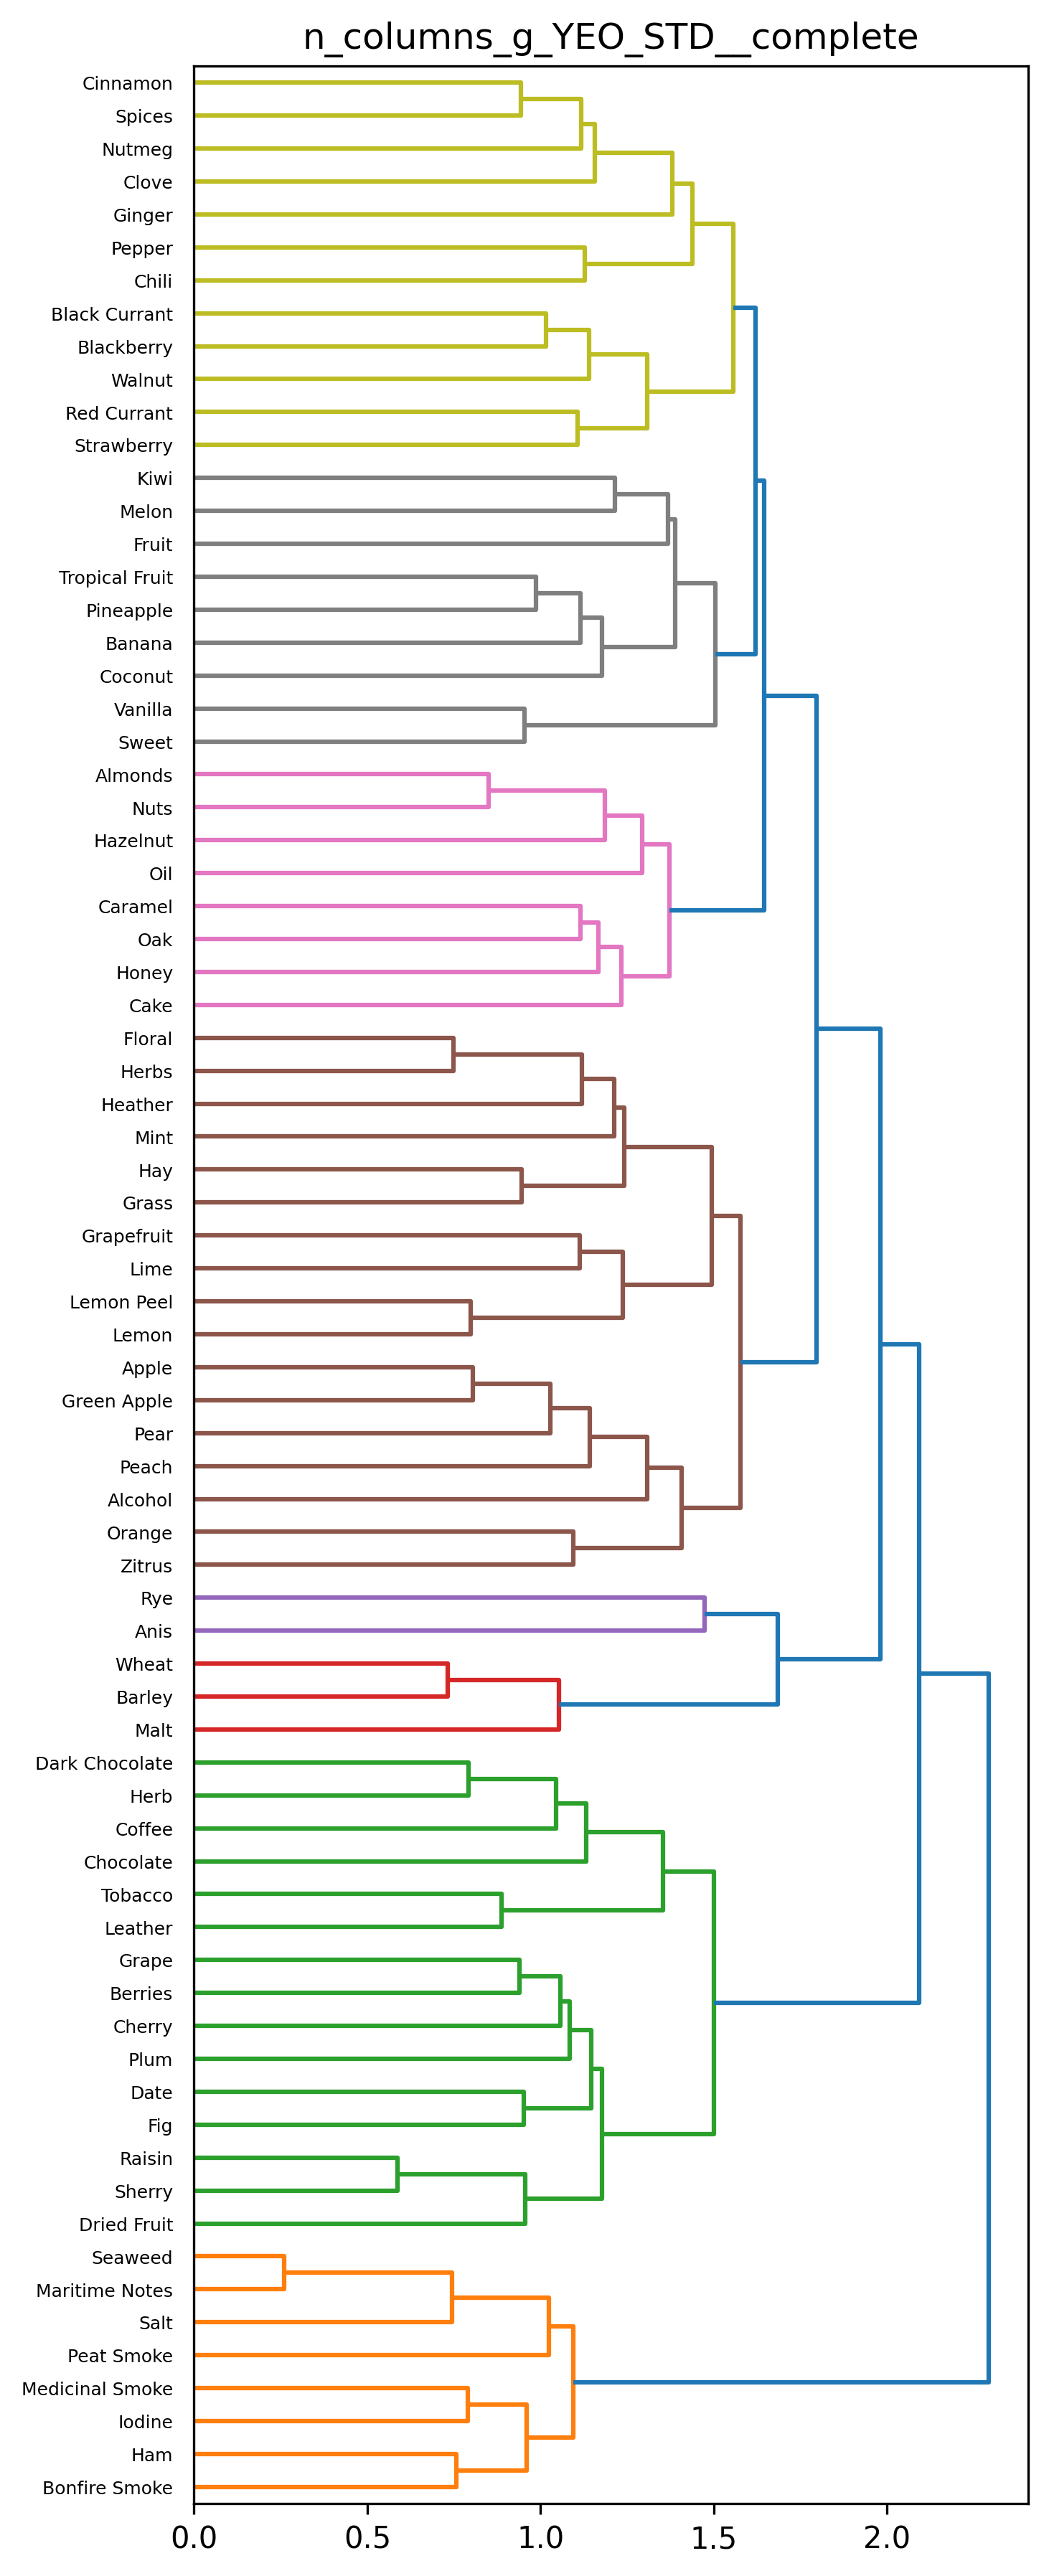

Cluster 1: ['Salt', 'Maritime Notes', 'Seaweed', 'Peat Smoke', 'Bonfire Smoke', 'Ham', 'Iodine', 'Medicinal Smoke']
Cluster 2: ['Sherry', 'Dried Fruit', 'Leather', 'Herb', 'Cherry', 'Fig', 'Raisin', 'Plum', 'Tobacco', 'Chocolate', 'Coffee', 'Berries', 'Grape', 'Dark Chocolate', 'Date']
Cluster 3: ['Malt', 'Barley', 'Wheat']
Cluster 4: ['Anis', 'Rye']
Cluster 5: ['Green Apple', 'Pear', 'Zitrus', 'Herbs', 'Floral', 'Apple', 'Lemon', 'Orange', 'Grass', 'Heather', 'Peach', 'Alcohol', 'Lime', 'Lemon Peel', 'Mint', 'Hay', 'Grapefruit']
Cluster 6: ['Honey', 'Oak', 'Caramel', 'Oil', 'Nuts', 'Cake', 'Hazelnut', 'Almonds']
Cluster 7: ['Sweet', 'Fruit', 'Vanilla', 'Pineapple', 'Tropical Fruit', 'Banana', 'Coconut', 'Melon', 'Kiwi']
Cluster 8: ['Spices', 'Cinnamon', 'Chili', 'Strawberry', 'Red Currant', 'Nutmeg', 'Walnut', 'Blackberry', 'Ginger', 'Clove', 'Pepper', 'Black Currant']

DF = t_columns_g_STD --- METHOD = complete


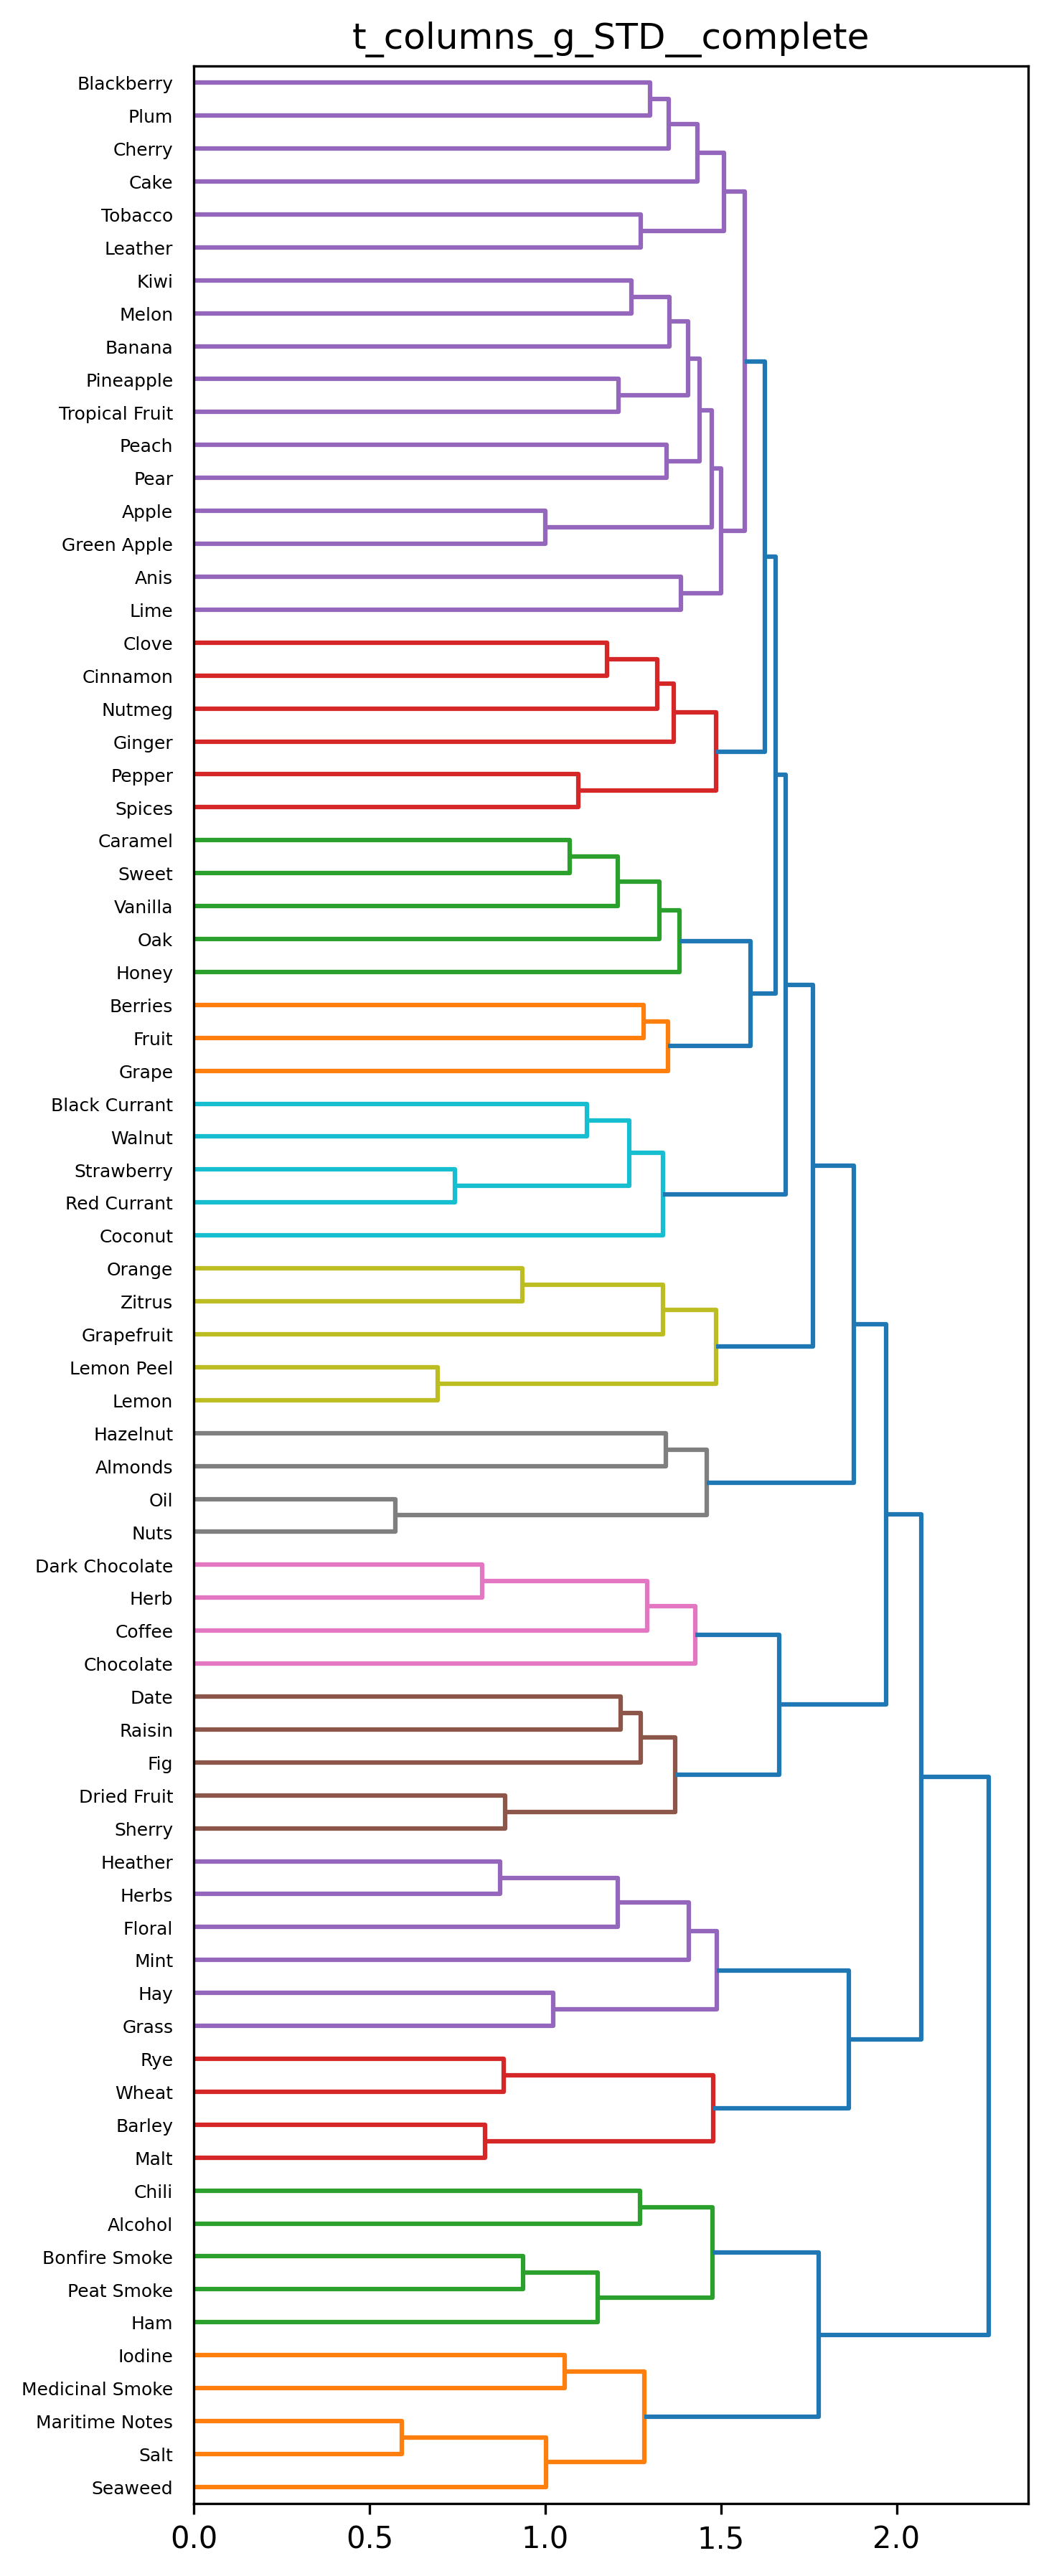

Cluster 1: ['Salt', 'Maritime Notes', 'Seaweed', 'Medicinal Smoke', 'Iodine']
Cluster 2: ['Alcohol', 'Peat Smoke', 'Bonfire Smoke', 'Chili', 'Ham']
Cluster 3: ['Malt', 'Barley', 'Wheat', 'Rye']
Cluster 4: ['Herbs', 'Heather', 'Grass', 'Floral', 'Mint', 'Hay']
Cluster 5: ['Sherry', 'Dried Fruit', 'Raisin', 'Date', 'Fig']
Cluster 6: ['Herb', 'Coffee', 'Chocolate', 'Dark Chocolate']
Cluster 7: ['Nuts', 'Oil', 'Almonds', 'Hazelnut']
Cluster 8: ['Zitrus', 'Lemon', 'Orange', 'Grapefruit', 'Lemon Peel']
Cluster 9: ['Walnut', 'Black Currant', 'Red Currant', 'Strawberry', 'Coconut']
Cluster 10: ['Fruit', 'Grape', 'Berries']
Cluster 11: ['Sweet', 'Vanilla', 'Caramel', 'Oak', 'Honey']
Cluster 12: ['Spices', 'Pepper', 'Nutmeg', 'Cinnamon', 'Ginger', 'Clove']
Cluster 13: ['Pear', 'Green Apple', 'Peach', 'Plum', 'Cherry', 'Leather', 'Tobacco', 'Blackberry', 'Tropical Fruit', 'Cake', 'Apple', 'Banana', 'Melon', 'Lime', 'Pineapple', 'Anis', 'Kiwi']

DF = t_columns_g_YEO_STD --- METHOD = complete


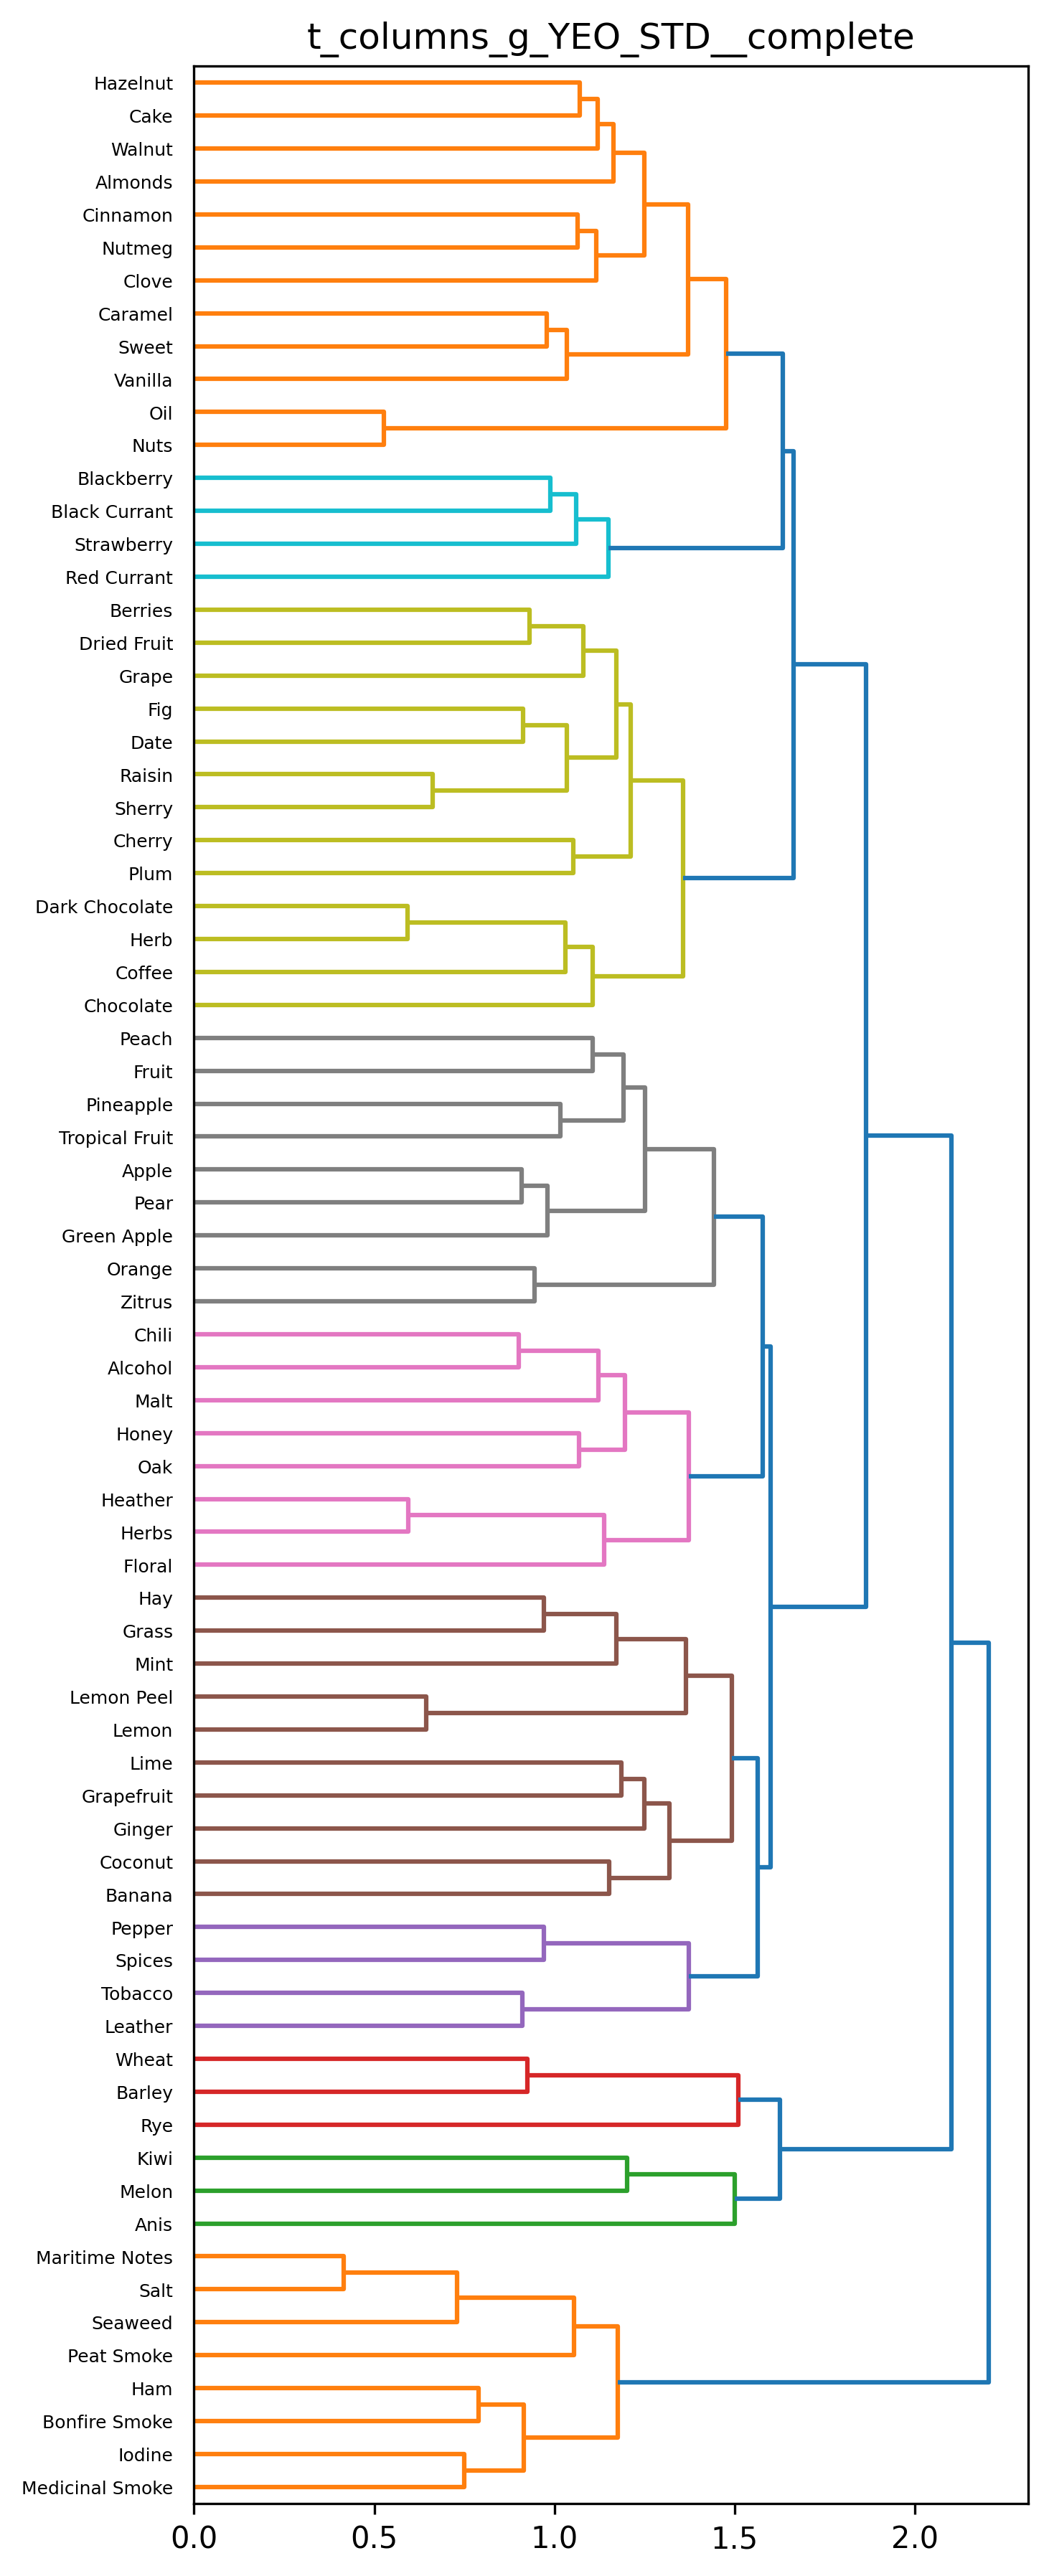

Cluster 1: ['Peat Smoke', 'Salt', 'Maritime Notes', 'Bonfire Smoke', 'Ham', 'Seaweed', 'Medicinal Smoke', 'Iodine']
Cluster 2: ['Melon', 'Anis', 'Kiwi']
Cluster 3: ['Barley', 'Wheat', 'Rye']
Cluster 4: ['Spices', 'Pepper', 'Leather', 'Tobacco']
Cluster 5: ['Lemon', 'Grass', 'Grapefruit', 'Lemon Peel', 'Ginger', 'Banana', 'Mint', 'Hay', 'Lime', 'Coconut']
Cluster 6: ['Malt', 'Oak', 'Honey', 'Alcohol', 'Chili', 'Herbs', 'Heather', 'Floral']
Cluster 7: ['Fruit', 'Pear', 'Green Apple', 'Zitrus', 'Orange', 'Peach', 'Tropical Fruit', 'Apple', 'Pineapple']
Cluster 8: ['Herb', 'Coffee', 'Chocolate', 'Sherry', 'Dried Fruit', 'Grape', 'Raisin', 'Plum', 'Cherry', 'Dark Chocolate', 'Berries', 'Date', 'Fig']
Cluster 9: ['Black Currant', 'Blackberry', 'Red Currant', 'Strawberry']
Cluster 10: ['Sweet', 'Vanilla', 'Caramel', 'Nuts', 'Oil', 'Nutmeg', 'Almonds', 'Walnut', 'Cake', 'Cinnamon', 'Hazelnut', 'Clove']

DF = f_columns_g_STD --- METHOD = complete


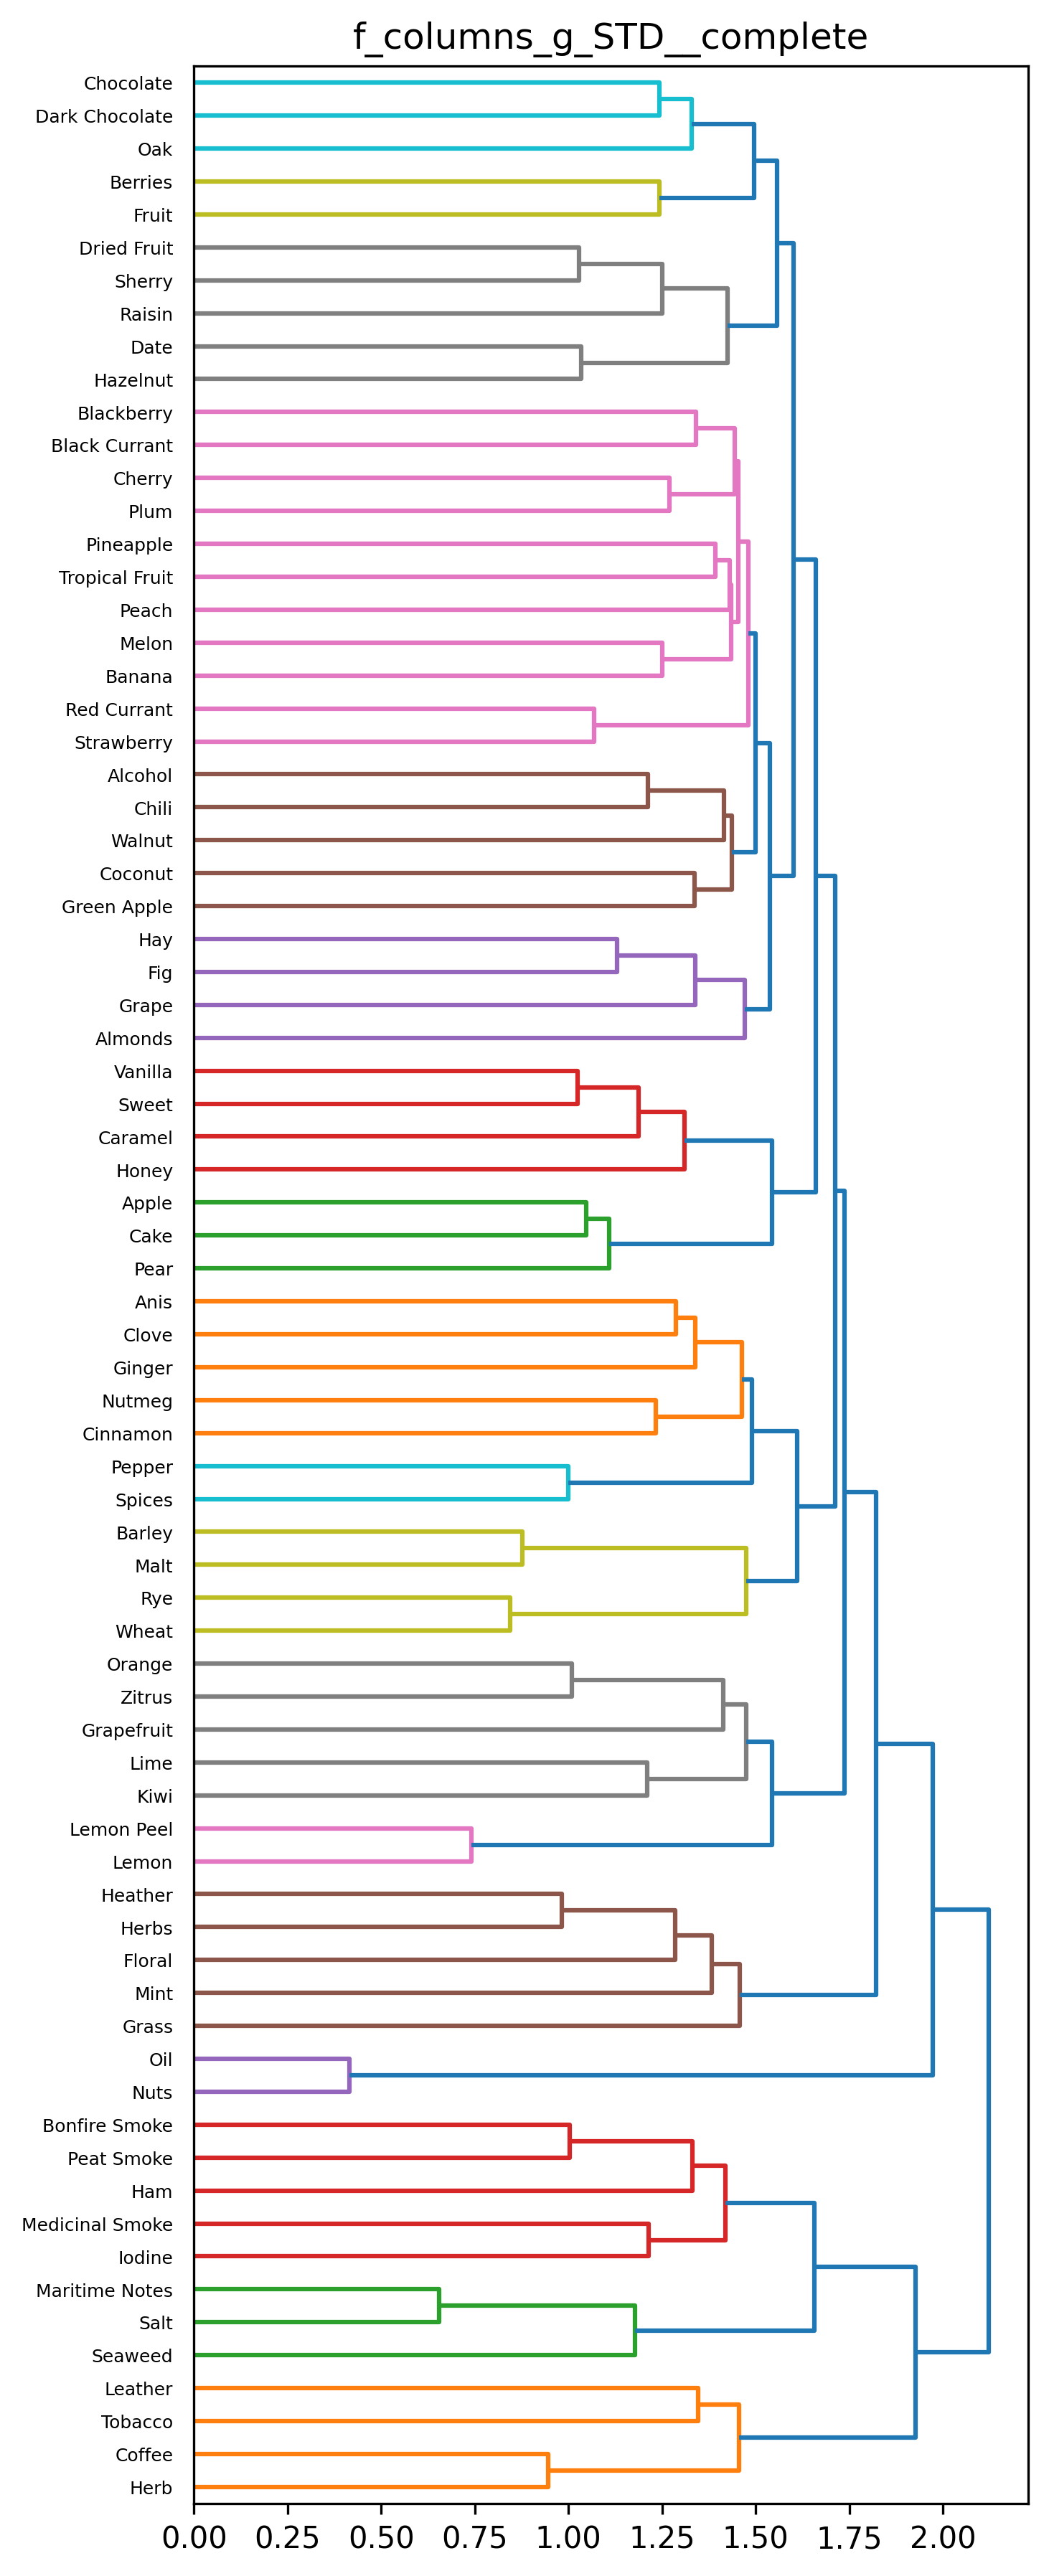

Cluster 1: ['Herb', 'Coffee', 'Tobacco', 'Leather']
Cluster 2: ['Salt', 'Maritime Notes', 'Seaweed']
Cluster 3: ['Peat Smoke', 'Bonfire Smoke', 'Ham', 'Iodine', 'Medicinal Smoke']
Cluster 4: ['Nuts', 'Oil']
Cluster 5: ['Floral', 'Herbs', 'Heather', 'Grass', 'Mint']
Cluster 6: ['Lemon', 'Lemon Peel']
Cluster 7: ['Zitrus', 'Orange', 'Kiwi', 'Lime', 'Grapefruit']
Cluster 8: ['Malt', 'Wheat', 'Barley', 'Rye']
Cluster 9: ['Spices', 'Pepper']
Cluster 10: ['Ginger', 'Cinnamon', 'Clove', 'Nutmeg', 'Anis']
Cluster 11: ['Cake', 'Apple', 'Pear']
Cluster 12: ['Sweet', 'Caramel', 'Honey', 'Vanilla']
Cluster 13: ['Grape', 'Almonds', 'Fig', 'Hay']
Cluster 14: ['Chili', 'Alcohol', 'Walnut', 'Green Apple', 'Coconut']
Cluster 15: ['Black Currant', 'Strawberry', 'Blackberry', 'Plum', 'Cherry', 'Banana', 'Tropical Fruit', 'Peach', 'Red Currant', 'Pineapple', 'Melon']
Cluster 16: ['Sherry', 'Raisin', 'Hazelnut', 'Dried Fruit', 'Date']
Cluster 17: ['Fruit', 'Berries']
Cluster 18: ['Oak', 'Dark Chocolate', '

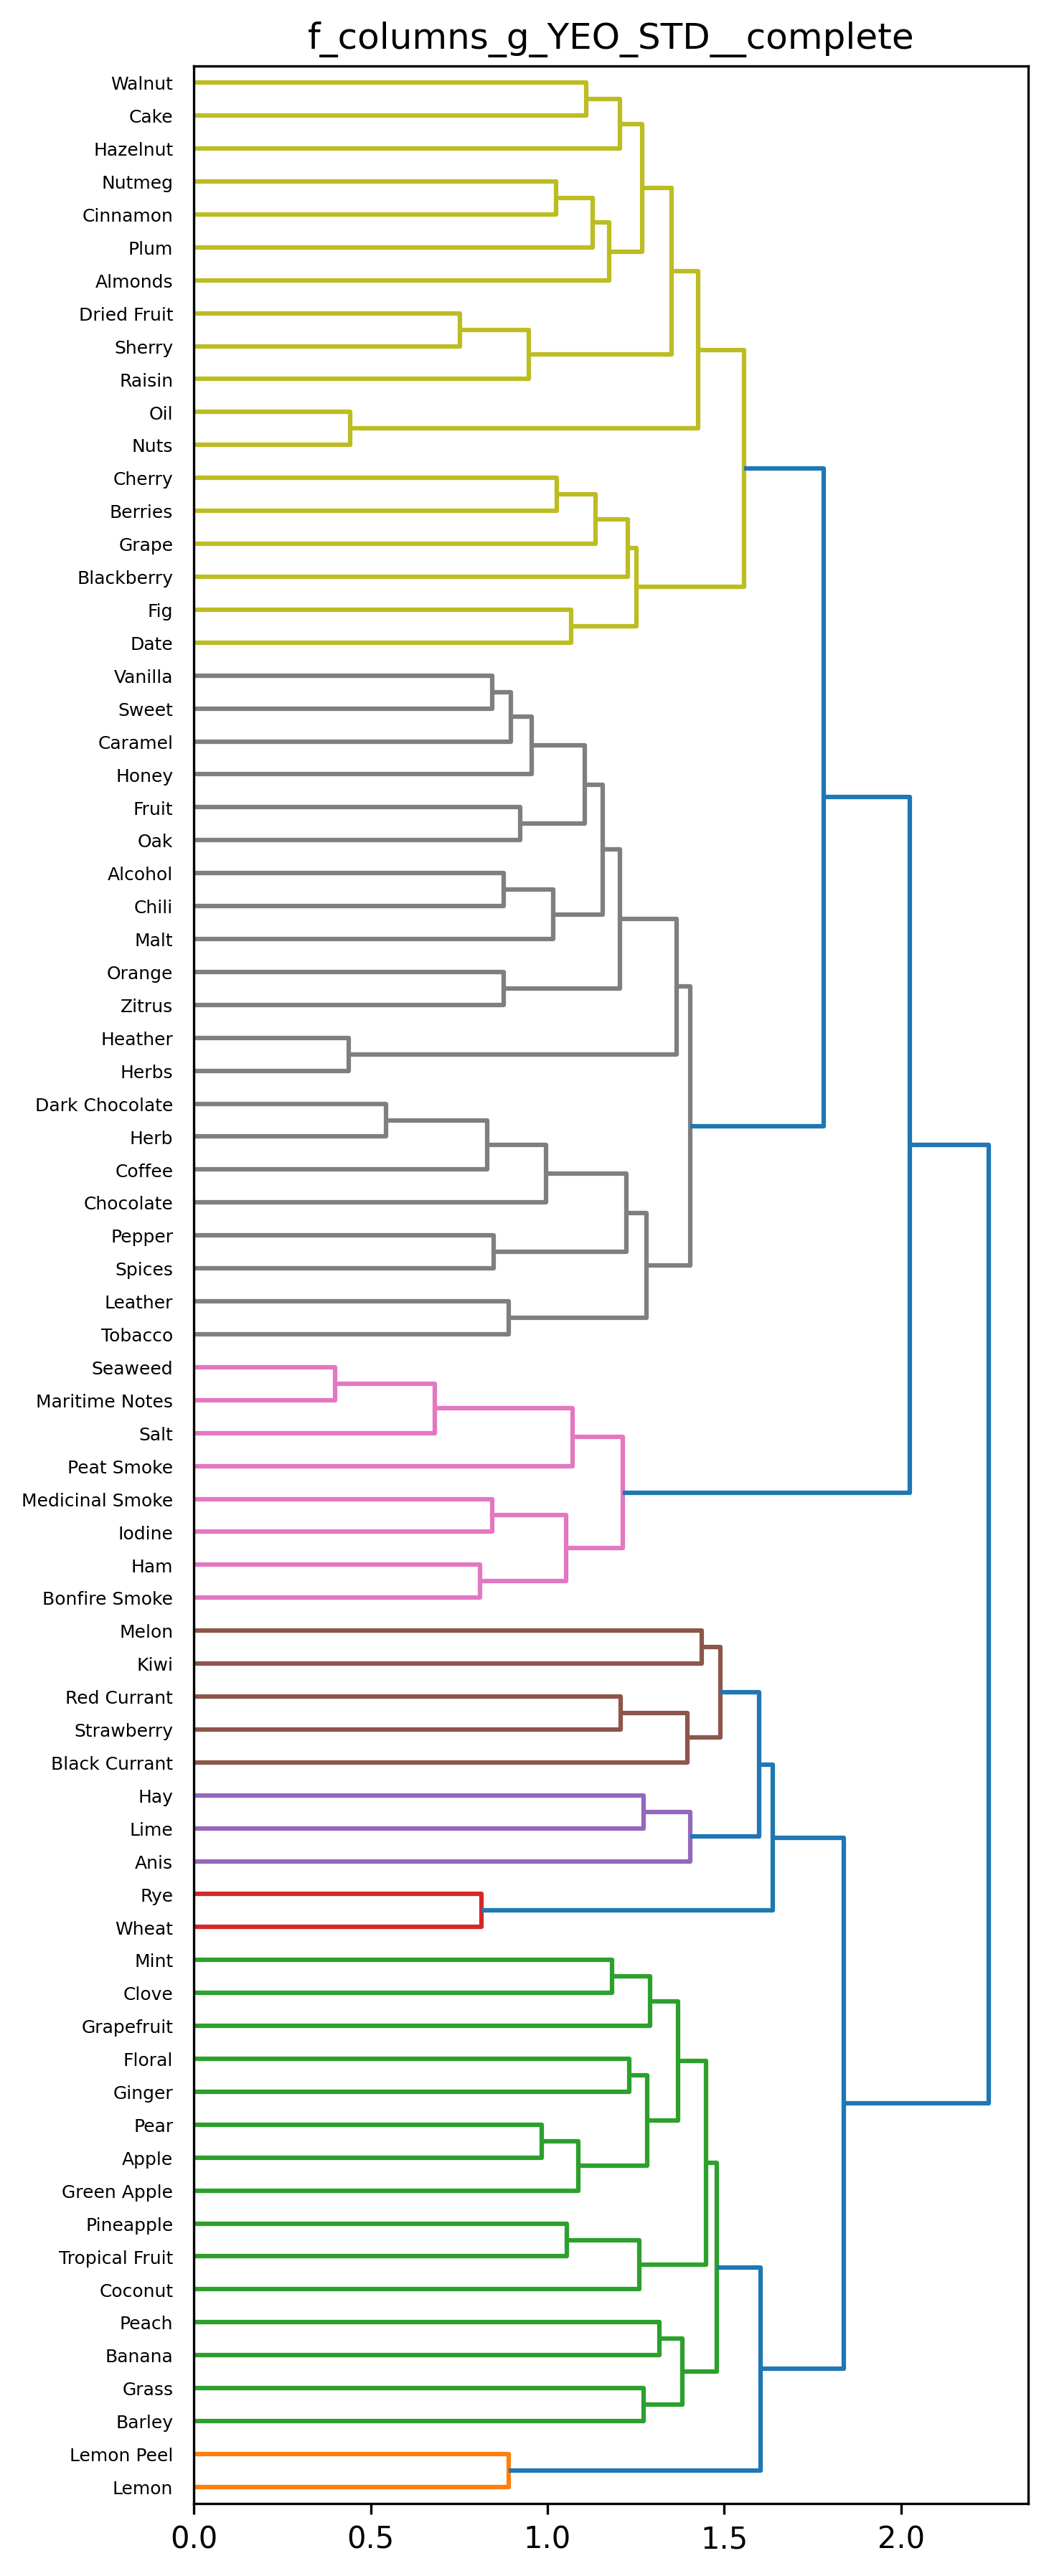

Cluster 1: ['Lemon', 'Lemon Peel']
Cluster 2: ['Ginger', 'Floral', 'Apple', 'Pear', 'Banana', 'Clove', 'Barley', 'Grass', 'Tropical Fruit', 'Peach', 'Mint', 'Grapefruit', 'Pineapple', 'Green Apple', 'Coconut']
Cluster 3: ['Wheat', 'Rye']
Cluster 4: ['Lime', 'Anis', 'Hay']
Cluster 5: ['Black Currant', 'Strawberry', 'Kiwi', 'Red Currant', 'Melon']
Cluster 6: ['Peat Smoke', 'Salt', 'Maritime Notes', 'Bonfire Smoke', 'Ham', 'Seaweed', 'Iodine', 'Medicinal Smoke']
Cluster 7: ['Spices', 'Sweet', 'Malt', 'Pepper', 'Oak', 'Fruit', 'Caramel', 'Honey', 'Zitrus', 'Herb', 'Dark Chocolate', 'Coffee', 'Chocolate', 'Vanilla', 'Orange', 'Herbs', 'Chili', 'Tobacco', 'Alcohol', 'Heather', 'Leather']
Cluster 8: ['Nuts', 'Oil', 'Grape', 'Sherry', 'Cake', 'Raisin', 'Berries', 'Blackberry', 'Cinnamon', 'Plum', 'Hazelnut', 'Walnut', 'Dried Fruit', 'Cherry', 'Date', 'Almonds', 'Nutmeg', 'Fig']


In [56]:
for dataframe, name in dfs:
    for method in methods:
        print(f"\nDF = {name} --- METHOD = {method}")
        create_hierarchical_clustering(dataframe, method)

## FACTOR ANALYSIS

In [57]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### Functions

In [58]:
def FA_test_datasets(data_for_FA):

# Bartlett’s test of sphericity checks whether or not the observed variables 
# intercorrelate at all using the observed correlation matrix against the 
# identity matrix. If the test found statistically insignificant, 
# you should not employ a factor analysis.
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
    chi_square_value,p_value=calculate_bartlett_sphericity(data_for_FA)
    print(f"Chi Square Value = {round(chi_square_value,3)}, p-Value = {p_value}")


#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. 
# KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
    from factor_analyzer.factor_analyzer import calculate_kmo
    kmo_all,kmo_model=calculate_kmo(data_for_FA)
    print(f"KMO Value = {round(kmo_model,3)}")

In [59]:
def FA_factors_to_retain(data_for_FA):

    ## PERFORM FACTOR ANALYSIS
    # Create factor analysis object and perform factor analysis
    fa = FactorAnalyzer()
    fa.fit(data_for_FA)

    ev, v = fa.get_eigenvalues()

    eigenvalues = pd.DataFrame({'eigenvalues':ev,'proportion':ev/len(ev),'cumul':np.cumsum(ev/len(ev))})
    factors_to_retain = len(eigenvalues[eigenvalues['eigenvalues']>=1])


    ## CALCULATE NUMBER OF FACTORS WITH EV >= 1 + EXPLAINED VARIANCE
    print(f"Number of factors with EV>=1: {factors_to_retain}")
    print(f"Explained variance: {round(eigenvalues[eigenvalues['eigenvalues']>=1]['proportion'].sum(),2)}")

    ## CREATE SCREE PLOT
    fig, ax = plt.subplots(figsize=(15,10), dpi=300)

    x_plot = range(1,data_for_FA.shape[1]+1)
    y_plot = ev

    plt.scatter(x_plot, y_plot)
    plt.plot(x_plot, y_plot)

    # Add line indicating the number of factors with eigenvalues >= 1
    plt.axvline(x=factors_to_retain, color='r', linestyle='--')

    # Add labels
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()

    # Save plot
    # plt.savefig('Screeplot.png')
    plt.show()

In [60]:
def FA_perform_technique(data_for_FA, factors_to_retain):

    # Perform FACTOR ANALYSIS
    factors = factors_to_retain
    fa = FactorAnalyzer(factors, rotation="varimax")
    fa.fit(data_for_FA)

    # (ROTATED) FACTOR LOADINGS = correlation with the factor
    factor_loadings = fa.loadings_
    factor_variances = tuple([np.round(arr, decimals=3) for arr in fa.get_factor_variance()])
    
    fa_overview_table = pd.DataFrame(factor_loadings, columns = np.arange(factors), index=data_for_FA.columns)

    # ADD UNIQUENESS: How much variance in the flavor is NOT captured by all the factors together:
    fa_overview_table['uniqueness'] = fa.get_uniquenesses()

    # ADD COMMUNALITY: How much variance in the flavor IS captured by all the factors together:
    # Low values mean that the flavor is not well represented by the common factors
    fa_overview_table['communality'] = fa.get_communalities()
    
    return factors, factor_loadings, factor_variances, fa_overview_table

In [61]:
def FA_loadings_heatmap(FA_factors, FA_loadings, FA_loadings_table, data_for_FA, top, treshold):
    fig, ax = plt.subplots(figsize=(7,20), dpi=300)
    im = ax.imshow(FA_loadings, cmap='RdBu_r')

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(FA_factors), labels=np.arange(FA_factors))
    ax.set_yticks(np.arange(len(data_for_FA.columns)), labels=data_for_FA.columns)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.set_title("FACTOR LOADINGS")
    cb = fig.colorbar(im, ax=ax, location='top', label="Factor Loading (between -1 and 1)")

    fig.tight_layout()
    # plt.savefig("loading_matrix.png")
    plt.show()
    
    ## Print top 5 loadings for each factor:
    top_x = top
    fa_flavors_TOP = {}

    print(f"\n\nTOP {top_x} FACTOR LOADINGS PER FACTOR:")
    for i in np.arange(FA_factors):
        fa_flavors_TOP[i] = FA_loadings_table.reset_index().sort_values(by=i,ascending=False).head(top_x)['index'].tolist()

    for i in fa_flavors_TOP:
        print(f"{i} = {fa_flavors_TOP[i]}")
        

## Print only loadings above a certain treshold:
    tresh = treshold

    print(f"\n\nFACTORS WITH LOADINGS ABOVE {tresh}:")
    for i in np.arange(FA_factors):
        fa_flavors_TOP[i] = FA_loadings_table[FA_loadings_table[i]>tresh].reset_index().sort_values(by=i,ascending=False)['index'].tolist()

    for i in fa_flavors_TOP:
        print(f"{i} = {fa_flavors_TOP[i]}")

In [62]:
# CREATE A TABLE WITH THE FA VARIANCES
def FA_factors_variances(FA_variances):
    print("\n\n EXPLAINED VARIANCES TABLE:")
    return pd.DataFrame(FA_variances, index=['Tot. var. expl.','Prop. of tot. var.','Cumul.'])

### Calculations

#### Nosing

In [63]:
# CHECK DATASETS + FACTORS TO RETAIN
data_for_FA = df_YEO_STD[n_columns_g]

FA_test_datasets(data_for_FA)
FA_factors_to_retain(data_for_FA)

Chi Square Value = 142874.4, p-Value = 0.0
KMO Value = 0.887
Number of factors with EV>=1: 17
Explained variance: 0.51


In [64]:
# CHOOSE NUMBER OF FACTORS
nbr_of_factors = 17

In [65]:
# PERFORM ROTATED FA + CREATE HEATMAP OF FACTOR LOADINGS
FA_factors, FA_loadings, FA_variances, FA_loadings_table = FA_perform_technique(data_for_FA, nbr_of_factors)
FA_loadings_heatmap(FA_factors, FA_loadings, FA_loadings_table, data_for_FA, 5, 0.30)
FA_factors_variances(FA_variances)



TOP 5 FACTOR LOADINGS PER FACTOR:
0 = ['n_Bonfire Smoke_g', 'n_Medicinal Smoke_g', 'n_Maritime Notes_g', 'n_Ham_g', 'n_Seaweed_g']
1 = ['n_Pineapple_g', 'n_Tropical Fruit_g', 'n_Banana_g', 'n_Fruit_g', 'n_Peach_g']
2 = ['n_Blackberry_g', 'n_Strawberry_g', 'n_Berries_g', 'n_Black Currant_g', 'n_Red Currant_g']
3 = ['n_Sherry_g', 'n_Raisin_g', 'n_Dried Fruit_g', 'n_Date_g', 'n_Fig_g']
4 = ['n_Herbs_g', 'n_Floral_g', 'n_Heather_g', 'n_Grass_g', 'n_Hay_g']
5 = ['n_Herb_g', 'n_Dark Chocolate_g', 'n_Leather_g', 'n_Coffee_g', 'n_Tobacco_g']
6 = ['n_Spices_g', 'n_Cinnamon_g', 'n_Ginger_g', 'n_Clove_g', 'n_Nutmeg_g']
7 = ['n_Nuts_g', 'n_Oil_g', 'n_Almonds_g', 'n_Hazelnut_g', 'n_Oak_g']
8 = ['n_Barley_g', 'n_Wheat_g', 'n_Malt_g', 'n_Rye_g', 'n_Hay_g']
9 = ['n_Sweet_g', 'n_Vanilla_g', 'n_Caramel_g', 'n_Honey_g', 'n_Oak_g']
10 = ['n_Maritime Notes_g', 'n_Seaweed_g', 'n_Salt_g', 'n_Dark Chocolate_g', 'n_Chocolate_g']
11 = ['n_Lemon_g', 'n_Lemon Peel_g', 'n_Zitrus_g', 'n_Lime_g', 'n_Green Apple_g'

0      1      2      3      4      5      6      7   \
Tot. var. expl.     3.999  2.793  2.725  2.710  2.311  2.155  1.657  1.632   
Prop. of tot. var.  0.054  0.038  0.037  0.037  0.031  0.029  0.022  0.022   
Cumul.              0.054  0.092  0.129  0.165  0.196  0.226  0.248  0.270   

                       8      9      10     11     12     13     14     15  \
Tot. var. expl.     1.613  1.459  1.135  1.100  1.063  1.028  0.920  0.560   
Prop. of tot. var.  0.022  0.020  0.015  0.015  0.014  0.014  0.012  0.008   
Cumul.              0.292  0.312  0.327  0.342  0.356  0.370  0.382  0.390   

                       16  
Tot. var. expl.     0.434  
Prop. of tot. var.  0.006  
Cumul.              0.396

#### Tasting

In [66]:
# CHECK DATASETS + FACTORS TO RETAIN
data_for_FA = df_YEO_STD[t_columns_g]

FA_test_datasets(data_for_FA)
FA_factors_to_retain(data_for_FA)

Chi Square Value = 151020.609, p-Value = 0.0
KMO Value = 0.905
Number of factors with EV>=1: 16
Explained variance: 0.51


In [67]:
# CHOOSE NUMBER OF FACTORS
nbr_of_factors = 16

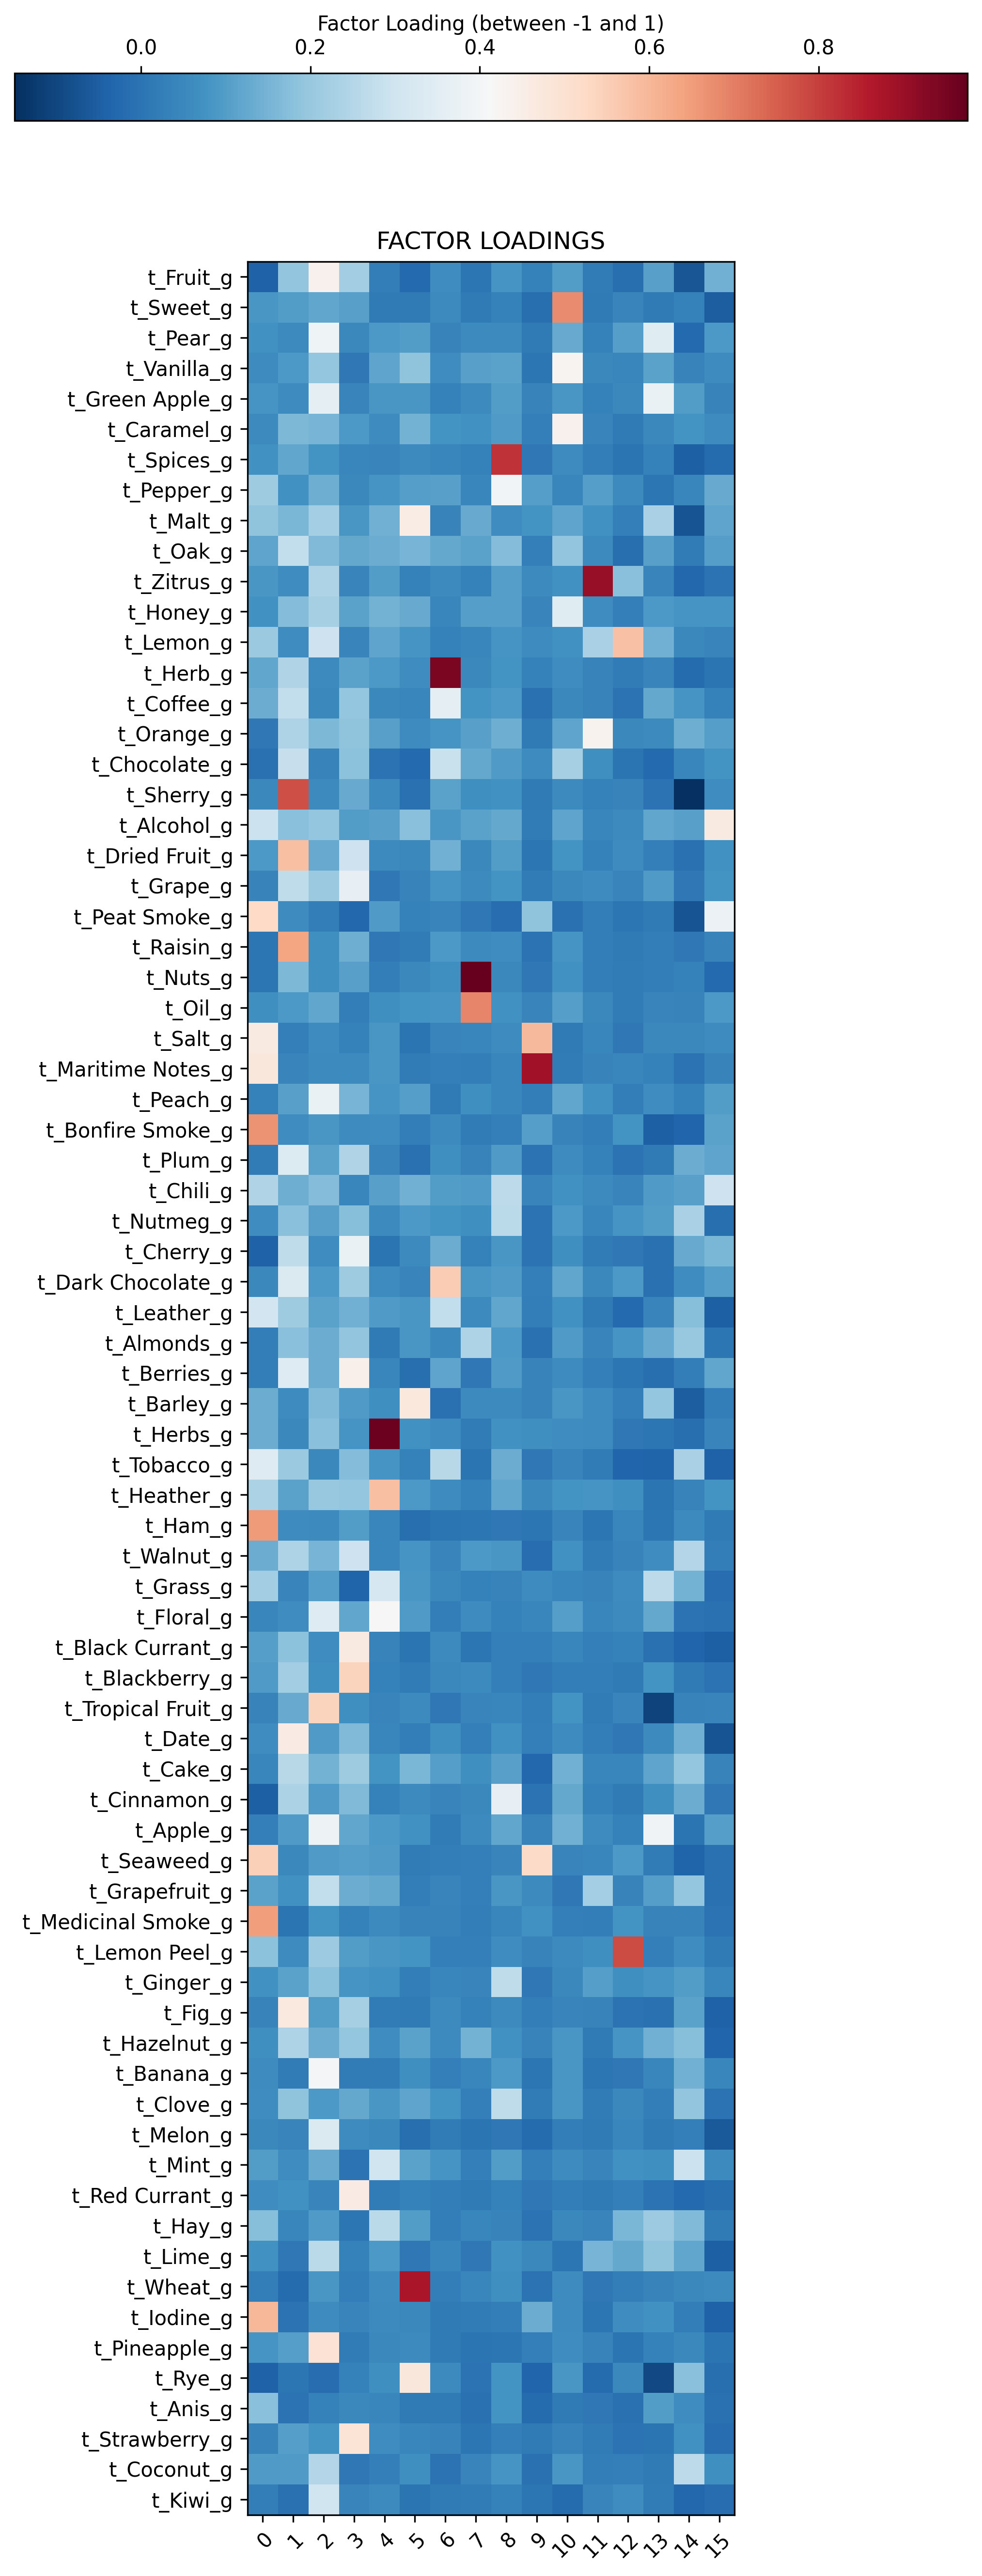



TOP 5 FACTOR LOADINGS PER FACTOR:
0 = ['t_Bonfire Smoke_g', 't_Ham_g', 't_Medicinal Smoke_g', 't_Iodine_g', 't_Seaweed_g']
1 = ['t_Sherry_g', 't_Raisin_g', 't_Dried Fruit_g', 't_Fig_g', 't_Date_g']
2 = ['t_Tropical Fruit_g', 't_Pineapple_g', 't_Fruit_g', 't_Banana_g', 't_Pear_g']
3 = ['t_Blackberry_g', 't_Strawberry_g', 't_Black Currant_g', 't_Red Currant_g', 't_Berries_g']
4 = ['t_Herbs_g', 't_Heather_g', 't_Floral_g', 't_Grass_g', 't_Mint_g']
5 = ['t_Wheat_g', 't_Rye_g', 't_Barley_g', 't_Malt_g', 't_Vanilla_g']
6 = ['t_Herb_g', 't_Dark Chocolate_g', 't_Coffee_g', 't_Chocolate_g', 't_Leather_g']
7 = ['t_Nuts_g', 't_Oil_g', 't_Almonds_g', 't_Hazelnut_g', 't_Malt_g']
8 = ['t_Spices_g', 't_Pepper_g', 't_Cinnamon_g', 't_Ginger_g', 't_Clove_g']
9 = ['t_Maritime Notes_g', 't_Salt_g', 't_Seaweed_g', 't_Peat Smoke_g', 't_Iodine_g']
10 = ['t_Sweet_g', 't_Caramel_g', 't_Vanilla_g', 't_Honey_g', 't_Chocolate_g']
11 = ['t_Zitrus_g', 't_Orange_g', 't_Lemon_g', 't_Grapefruit_g', 't_Lime_g']
12 = 

0      1      2      3      4      5      6      7   \
Tot. var. expl.     3.623  3.514  3.004  2.512  2.069  1.822  1.817  1.716   
Prop. of tot. var.  0.049  0.047  0.041  0.034  0.028  0.025  0.025  0.023   
Cumul.              0.049  0.096  0.137  0.171  0.199  0.224  0.248  0.271   

                       8      9      10     11     12     13     14     15  
Tot. var. expl.     1.672  1.556  1.423  1.254  1.161  0.953  0.919  0.735  
Prop. of tot. var.  0.023  0.021  0.019  0.017  0.016  0.013  0.012  0.010  
Cumul.              0.294  0.315  0.334  0.351  0.367  0.380  0.392  0.402

In [68]:
# PERFORM ROTATED FA + CREATE HEATMAP OF FACTOR LOADINGS
FA_factors, FA_loadings, FA_variances, FA_loadings_table = FA_perform_technique(data_for_FA, nbr_of_factors)
FA_loadings_heatmap(FA_factors, FA_loadings, FA_loadings_table, data_for_FA, 5, 0.30)
FA_factors_variances(FA_variances)

#### Finish

Chi Square Value = 149624.685, p-Value = 0.0
KMO Value = 0.91
Number of factors with EV>=1: 19
Explained variance: 0.54


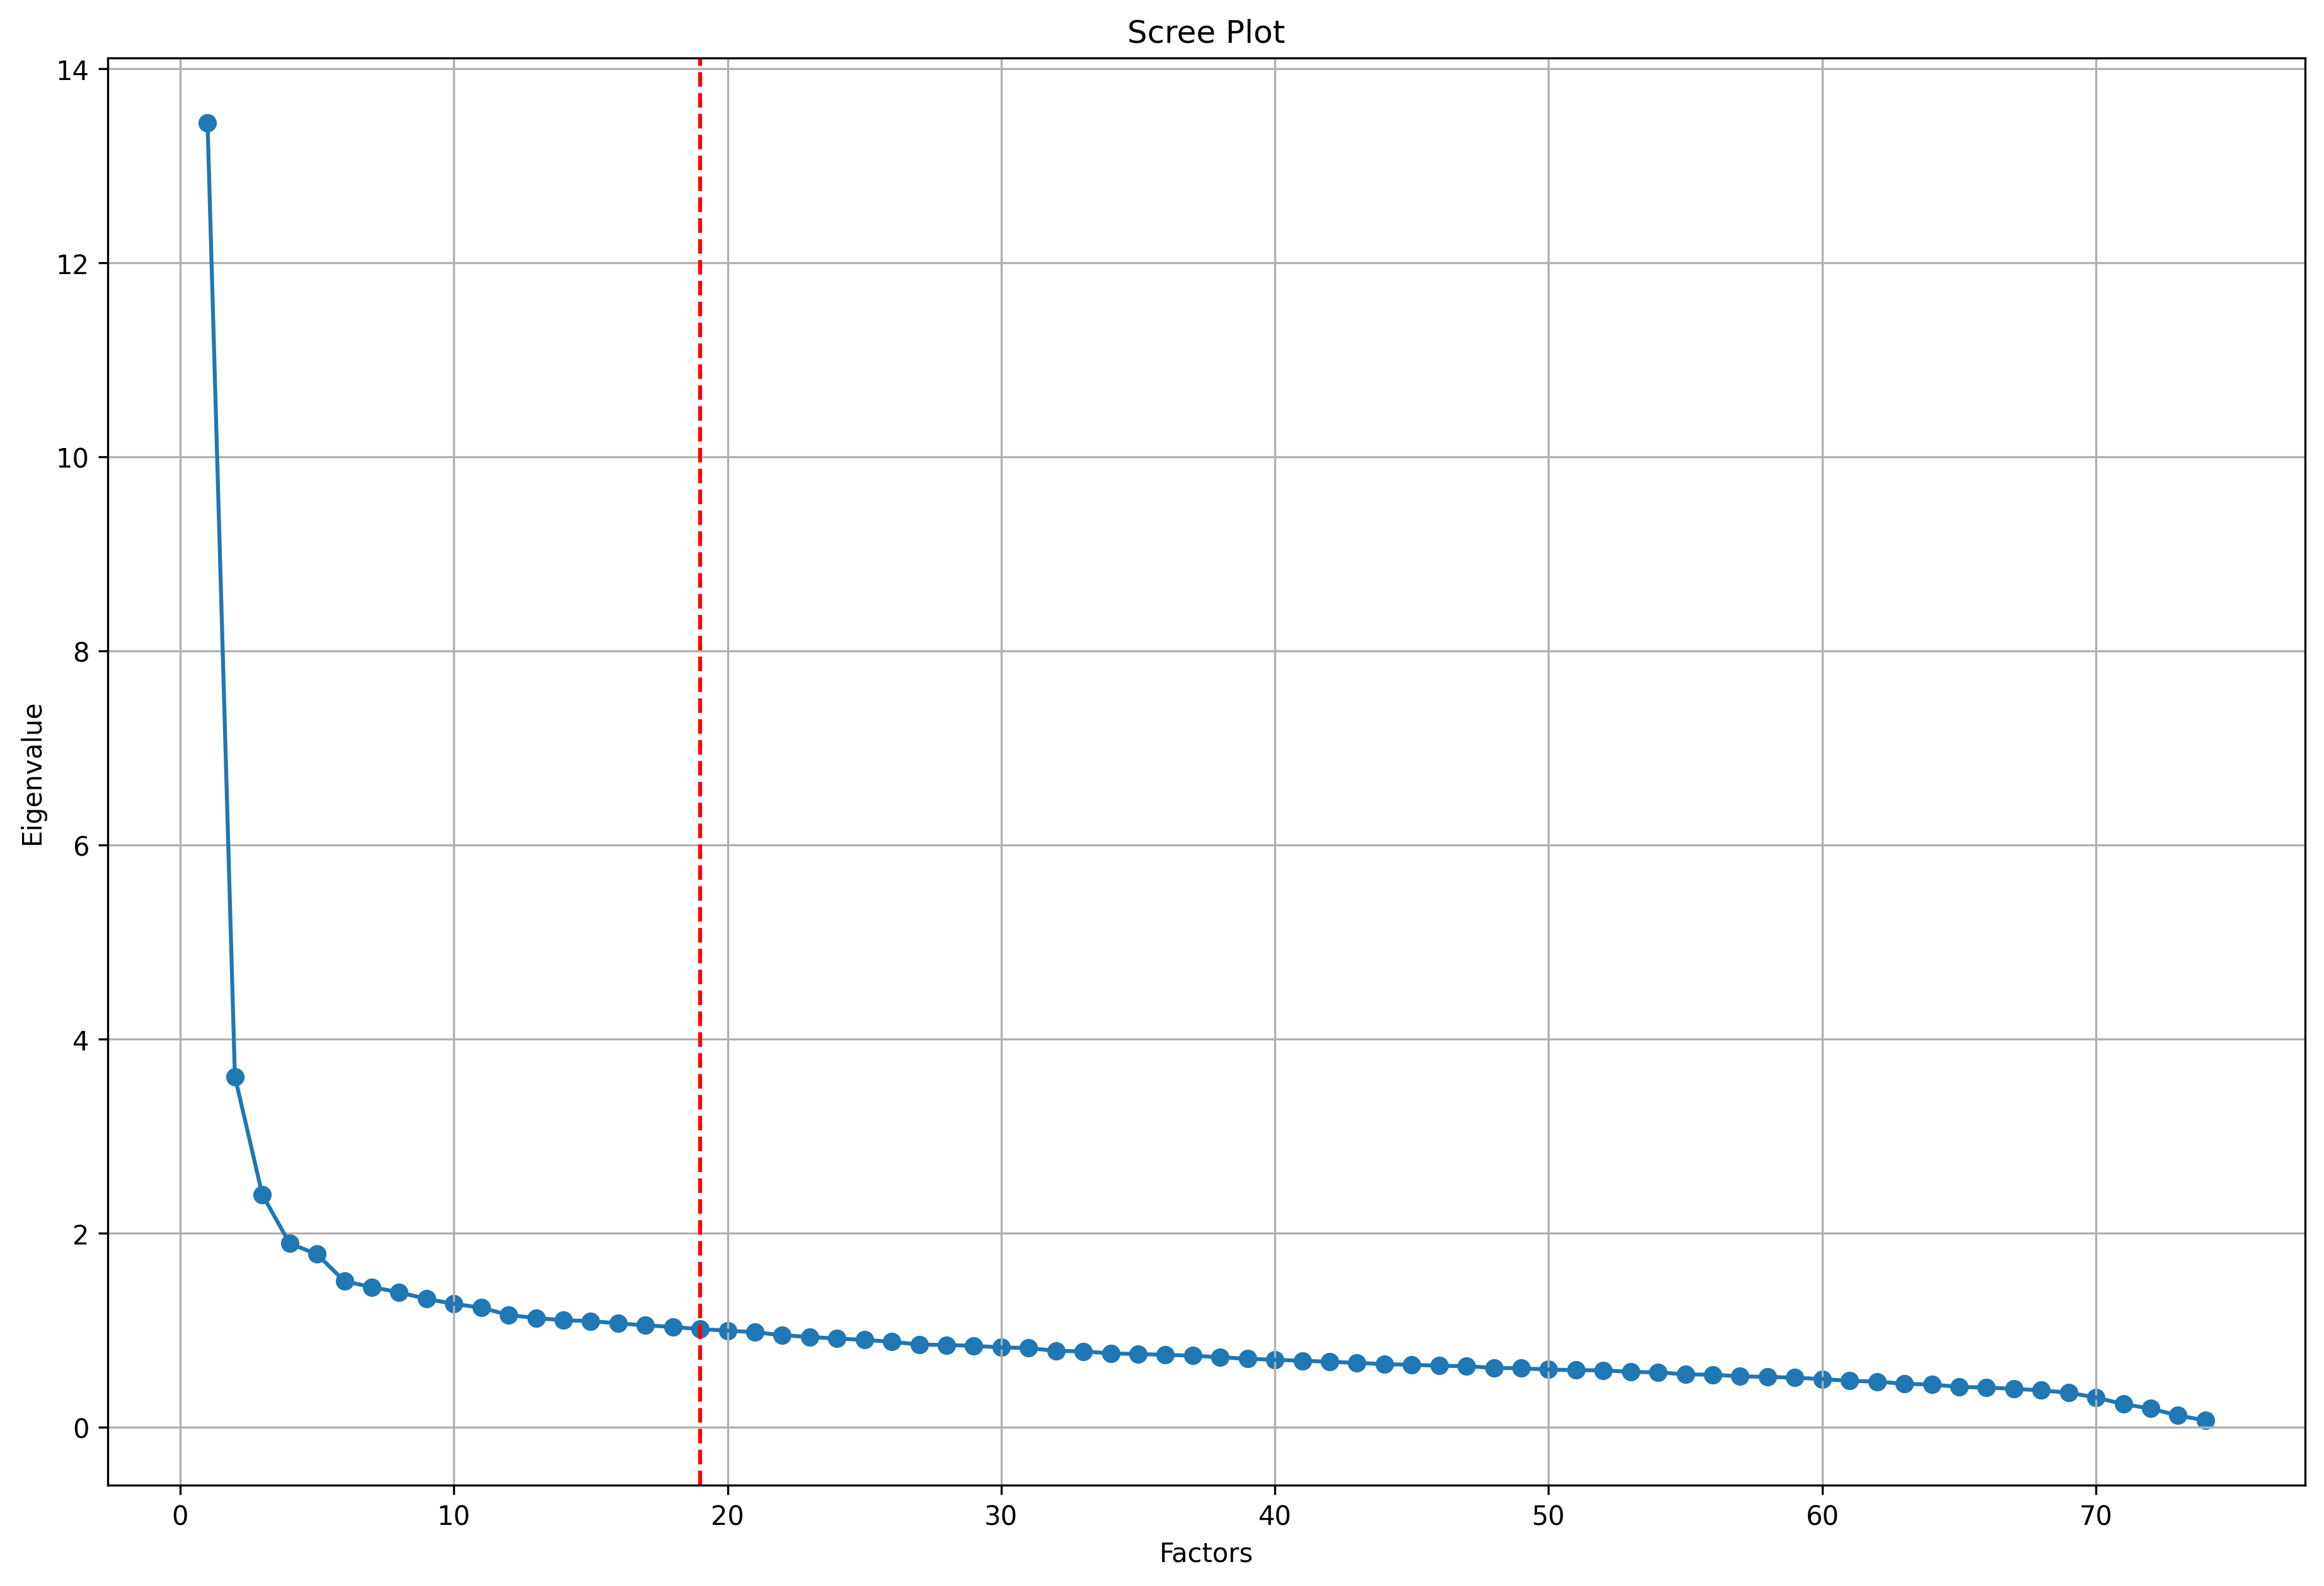

In [69]:
# CHECK DATASETS + FACTORS TO RETAIN
data_for_FA = df_YEO_STD[f_columns_g]

FA_test_datasets(data_for_FA)
FA_factors_to_retain(data_for_FA)

In [70]:
# CHOOSE NUMBER OF FACTORS
nbr_of_factors = 19

In [71]:
# PERFORM ROTATED FA + CREATE HEATMAP OF FACTOR LOADINGS
FA_factors, FA_loadings, FA_variances, FA_loadings_table = FA_perform_technique(data_for_FA, nbr_of_factors)
FA_loadings_heatmap(FA_factors, FA_loadings, FA_loadings_table, data_for_FA, 5, 0.20)
FA_factors_variances(FA_variances)



TOP 5 FACTOR LOADINGS PER FACTOR:
0 = ['f_Dried Fruit_g', 'f_Sherry_g', 'f_Raisin_g', 'f_Berries_g', 'f_Fig_g']
1 = ['f_Medicinal Smoke_g', 'f_Iodine_g', 'f_Ham_g', 'f_Bonfire Smoke_g', 'f_Seaweed_g']
2 = ['f_Pear_g', 'f_Apple_g', 'f_Green Apple_g', 'f_Banana_g', 'f_Fruit_g']
3 = ['f_Maritime Notes_g', 'f_Salt_g', 'f_Seaweed_g', 'f_Peat Smoke_g', 'f_Bonfire Smoke_g']
4 = ['f_Herb_g', 'f_Dark Chocolate_g', 'f_Coffee_g', 'f_Chocolate_g', 'f_Leather_g']
5 = ['f_Herbs_g', 'f_Heather_g', 'f_Floral_g', 'f_Mint_g', 'f_Grass_g']
6 = ['f_Sweet_g', 'f_Vanilla_g', 'f_Caramel_g', 'f_Honey_g', 'f_Chocolate_g']
7 = ['f_Nuts_g', 'f_Oil_g', 'f_Almonds_g', 'f_Malt_g', 'f_Hazelnut_g']
8 = ['f_Wheat_g', 'f_Rye_g', 'f_Barley_g', 'f_Malt_g', 'f_Caramel_g']
9 = ['f_Spices_g', 'f_Pepper_g', 'f_Chili_g', 'f_Ginger_g', 'f_Oak_g']
10 = ['f_Lemon_g', 'f_Lemon Peel_g', 'f_Zitrus_g', 'f_Grapefruit_g', 'f_Seaweed_g']
11 = ['f_Zitrus_g', 'f_Orange_g', 'f_Grapefruit_g', 'f_Lime_g', 'f_Lemon_g']
12 = ['f_Pineapple_g

0      1      2      3      4      5      6      7   \
Tot. var. expl.     4.721  2.870  2.185  2.144  2.105  2.008  1.782  1.727   
Prop. of tot. var.  0.064  0.039  0.030  0.029  0.028  0.027  0.024  0.023   
Cumul.              0.064  0.103  0.132  0.161  0.190  0.217  0.241  0.264   

                       8      9      10     11     12     13     14     15  \
Tot. var. expl.     1.568  1.365  1.246  1.174  1.115  0.734  0.640  0.640   
Prop. of tot. var.  0.021  0.018  0.017  0.016  0.015  0.010  0.009  0.009   
Cumul.              0.285  0.304  0.321  0.336  0.352  0.361  0.370  0.379   

                       16     17     18  
Tot. var. expl.     0.601  0.588  0.437  
Prop. of tot. var.  0.008  0.008  0.006  
Cumul.              0.387  0.395  0.401

## PCA

In [160]:
from sklearn.decomposition import PCA

In [73]:
def apply_PCA(data_for_PCA, top):
    ## PERFORM PCA + RETURN NBR OF PCA WITH EXPLAINED VAR. >= 80%
    nbr_of_pc = 1

    while True:
        pca_columns = [f"PC{i}" for i in range(1,nbr_of_pc+1)]
        
        pca = PCA(n_components=nbr_of_pc)
        principal_components = pca.fit_transform(data_for_PCA)
        df_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

        # Calculate the explained variance of each PC
        pca_var = pd.DataFrame(data=pca.explained_variance_ratio_, index=pca_columns, columns=['Explained Variance'])
        if pca_var['Explained Variance'].sum() >= .8:
            break
        else:
            nbr_of_pc += 1
            continue

    print('Number of original features:',pca.n_features_in_)
    print('Number of PC:',nbr_of_pc)
    print('Total explained variance =',round(pca_var['Explained Variance'].sum()*100,2),'%')

    # Graphic representation of the explained variance
    ax = pca_var.head(nbr_of_pc).plot.bar(legend=False, figsize=(10, 4))
    #ax.set_xlabel('Component')
    ax.set_ylabel('% Expl var')
    ax.set_title('Explained Variance per Principal Component')
    plt.tight_layout()
    
    
    ## CREATE SCREEPLOT
    # Individual explained variances for 10 components
    individual_variances = pca.explained_variance_ratio_

    # Compute the cumulative explained variance
    cumulative_variances = np.cumsum(individual_variances)

    # Create the bar plot for individual variances
    plt.figure(figsize=(12, 7), dpi=300)
    bar = plt.bar(range(1, nbr_of_pc+1), individual_variances, alpha=0.6, color='g', label='Individual Explained Variance')

    # Create the line plot for cumulative variance
    line = plt.plot(range(1, nbr_of_pc+1), cumulative_variances, marker='o', linestyle='-', color='r', 
                    label='Cumulative Explained Variance')

    # Adding percentage values on top of bars and dots
    for i, (bar, cum_val) in enumerate(zip(bar, cumulative_variances)):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{individual_variances[i]*100:.1f}%', 
                ha='center', va='bottom')
        plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

    # Aesthetics for the plot
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance per Principal Component (in total >= 80%)')
    plt.xticks(range(1, nbr_of_pc+1))
    plt.legend(loc='upper left')
    plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
    plt.grid(True)
    plt.savefig("PCA.png")
    plt.show()
    
    
    ## RETURN THE TOP 5 FLAVOR NOTES PER PCA
    loadings = pd.DataFrame(pca.components_.T, columns=pca_columns, index=data_for_PCA.columns).reset_index()
    
    top_x = top
    pca_flavors_TOP = {}

    print(f"TOP {top_x}")
    
    for i in pca_columns:
        pca_flavors_TOP[i] = loadings.sort_values(by=i,ascending=False).head(top_x)['index'].tolist()

    for i in pca_flavors_TOP:
        print(f"{i} = {pca_flavors_TOP[i]}")
    
    return df_pca, loadings

### Nosing

In [161]:
data_for_PCA = df_ROBUST[n_columns_g]

nosing_df_pca, nosing_loadings = apply_PCA(data_for_PCA,top=5)

Number of original features: 74
Number of PC: 12
Total explained variance = 81.16 %


TOP 5
PC1 = ['n_Herbs_g', 'n_Floral_g', 'n_Honey_g', 'n_Heather_g', 'n_Zitrus_g']
PC2 = ['n_Nuts_g', 'n_Herbs_g', 'n_Honey_g', 'n_Oil_g', 'n_Almonds_g']
PC3 = ['n_Honey_g', 'n_Malt_g', 'n_Caramel_g', 'n_Sweet_g', 'n_Oak_g']
PC4 = ['n_Malt_g', 'n_Barley_g', 'n_Peat Smoke_g', 'n_Wheat_g', 'n_Nuts_g']
PC5 = ['n_Caramel_g', 'n_Malt_g', 'n_Oak_g', 'n_Sherry_g', 'n_Vanilla_g']
PC6 = ['n_Caramel_g', 'n_Peat Smoke_g', 'n_Zitrus_g', 'n_Maritime Notes_g', 'n_Seaweed_g']
PC7 = ['n_Zitrus_g', 'n_Lemon_g', 'n_Orange_g', 'n_Lemon Peel_g', 'n_Lime_g']
PC8 = ['n_Sherry_g', 'n_Raisin_g', 'n_Oak_g', 'n_Zitrus_g', 'n_Spices_g']
PC9 = ['n_Oak_g', 'n_Spices_g', 'n_Vanilla_g', 'n_Peat Smoke_g', 'n_Berries_g']
PC10 = ['n_Spices_g', 'n_Cinnamon_g', 'n_Ginger_g', 'n_Pepper_g', 'n_Chocolate_g']
PC11 = ['n_Herb_g', 'n_Chocolate_g', 'n_Dark Chocolate_g', 'n_Leather_g', 'n_Coffee_g']
PC12 = ['n_Vanilla_g', 'n_Sweet_g', 'n_Pear_g', 'n_Chocolate_g', 'n_Fruit_g']


In [75]:
PC = 7
nosing_loadings.sort_values(by = f'PC{PC}', ascending=False).head(10)

index       PC1       PC2       PC3       PC4       PC5  \
4       n_Zitrus_g  0.078045  0.001884  0.034024  0.010418  0.008582   
19       n_Lemon_g  0.010459 -0.001977 -0.001568  0.000753 -0.011468   
20      n_Orange_g  0.005168  0.005158  0.012582 -0.008006  0.008235   
63  n_Lemon Peel_g  0.003881  0.000640 -0.003503 -0.002449 -0.001845   
50        n_Lime_g  0.003186 -0.001503  0.000877  0.002022  0.000387   
10       n_Apple_g  0.003556 -0.001963  0.019779  0.006589  0.015846   
8      n_Vanilla_g -0.007282  0.014695  0.037532 -0.006512  0.070927   
71  n_Grapefruit_g  0.005774  0.000106 -0.001280 -0.002182  0.001098   
3         n_Pear_g  0.015228  0.000940  0.010657  0.013140  0.018829   
48       n_Peach_g  0.003568  0.003343  0.000172 -0.001271  0.004059   

         PC6       PC7       PC8       PC9      PC10      PC11      PC12  
4   0.256608  0.921282  0.180146 -0.010693 -0.048037 -0.007580 -0.047130  
19  0.035377  0.126155  0.011804 -0.000910 -0.022624  0.001188  0.015415  
20  0.032198  0.117976  0.059854 -0.009313  0.007009  0.028423 -0.015609  
63  0.010798  0.038644 -0.000269 -0.001072 -0.012589  0.005598 -0.016351  
50  0.010497  0.037755  0.002685 -0.005027 -0.004366 -0.004015  0.008422  
10  0.005744  0.033811 -0.003584 -0.007559 -0.018388 -0.035427  0.068624  
8   0.044207  0.030274 -0.021153  0.111891 -0.009482 -0.040024  0.901942  
71  0.005315  0.029034  0.003775 -0.000852  0.002497 -0.008138 -0.016213  
3  -0.015496  0.021051 -0.028066 -0.012689 -0.037926 -0.030159  0.153515  
48 -0.018320  0.016968 -0.013198 -0.010687 -0.012533 -0.007413  0.036453

In [162]:
nosing_PCA_names = [
    'n_Floral_herbiness',
    'n_Sweet_nuttiness',
    'n_Amber_sweetness',
    'n_Dry_smokey_graininess',
    'n_Amber_sweetness',
    'n_Salty_sweet_smokiness',
    'n_Citrussiness',
    'n_Dry_sherriness',
    'n_Spiced_sweet_smokiness',
    'n_Peppery_spiciness',
    'n_Bitter_chocolatiness',
    'n_Mellow_sweetness'
]

In [163]:
nosing_df_pca.columns = nosing_PCA_names

### Tasting

In [164]:
data_for_PCA = df_ROBUST[t_columns_g]

tasting_df_pca, tasting_loadings = apply_PCA(data_for_PCA,top=5)

Number of original features: 74
Number of PC: 11
Total explained variance = 81.42 %


TOP 5
PC1 = ['t_Herbs_g', 't_Pepper_g', 't_Zitrus_g', 't_Peat Smoke_g', 't_Floral_g']
PC2 = ['t_Pepper_g', 't_Chocolate_g', 't_Oil_g', 't_Nuts_g', 't_Spices_g']
PC3 = ['t_Chocolate_g', 't_Herb_g', 't_Oil_g', 't_Herbs_g', 't_Nuts_g']
PC4 = ['t_Oil_g', 't_Nuts_g', 't_Honey_g', 't_Vanilla_g', 't_Pepper_g']
PC5 = ['t_Honey_g', 't_Caramel_g', 't_Vanilla_g', 't_Sweet_g', 't_Pepper_g']
PC6 = ['t_Herb_g', 't_Peat Smoke_g', 't_Dark Chocolate_g', 't_Sherry_g', 't_Coffee_g']
PC7 = ['t_Zitrus_g', 't_Herb_g', 't_Caramel_g', 't_Vanilla_g', 't_Orange_g']
PC8 = ['t_Zitrus_g', 't_Peat Smoke_g', 't_Orange_g', 't_Maritime Notes_g', 't_Lemon_g']
PC9 = ['t_Caramel_g', 't_Vanilla_g', 't_Peat Smoke_g', 't_Malt_g', 't_Sweet_g']
PC10 = ['t_Sherry_g', 't_Raisin_g', 't_Dried Fruit_g', 't_Zitrus_g', 't_Oak_g']
PC11 = ['t_Malt_g', 't_Vanilla_g', 't_Barley_g', 't_Wheat_g', 't_Chocolate_g']


In [79]:
PC = 11
tasting_loadings.sort_values(by = f'PC{PC}', ascending=False).head(10)

index       PC1       PC2       PC3       PC4       PC5       PC6  \
8        t_Malt_g  0.008536 -0.020478 -0.046445  0.041143  0.008926  0.058034   
3     t_Vanilla_g  0.003639 -0.009469  0.006261  0.076292  0.109126  0.057368   
37     t_Barley_g -0.000715 -0.003910 -0.010386  0.004905 -0.000584  0.002223   
66      t_Wheat_g  0.002051 -0.001218 -0.008492  0.005782  0.002215  0.004319   
16  t_Chocolate_g -0.077259  0.178727  0.814454 -0.336540  0.017817 -0.368299   
9         t_Oak_g  0.002148  0.001750  0.007652  0.007131  0.036168  0.035965   
1       t_Sweet_g  0.000173  0.006100  0.044854 -0.000835  0.068653  0.008007   
20      t_Grape_g -0.004934  0.000484  0.007183 -0.001838  0.004589 -0.001965   
0       t_Fruit_g  0.000998  0.003615  0.010295 -0.001788  0.017110  0.007479   
6      t_Spices_g  0.027795  0.047507  0.004329  0.000293  0.025340  0.011859   

         PC7       PC8       PC9      PC10      PC11  
8  -0.069850  0.034422  0.156602  0.048188  0.798259  
3   0.117641 -0.011249  0.334848 -0.062023  0.441652  
37 -0.003876 -0.001231  0.025232 -0.004760  0.148876  
66  0.001797 -0.013866  0.023937 -0.011396  0.101297  
16 -0.162850  0.039890  0.050283 -0.090388  0.078013  
9  -0.005314  0.006798  0.083309  0.094263  0.071831  
1  -0.011213  0.016506  0.105869  0.017968  0.034480  
20 -0.000778 -0.003127  0.002037  0.016718  0.023680  
0   0.008986 -0.000601  0.009625  0.058762  0.023396  
6   0.004336 -0.004675  0.014948  0.047354  0.022211

In [165]:
tasting_PCA_names = [
    't_Herby_pepperiness',
    't_Peppery_nutty_chocolatiness',
    't_Herby_chocolatty_nuttiness',
    't_Sweet_oily_nuttiness',
    't_Caramelly_sweetness',
    't_Smokey_chocolatiness',
    't_Mellow_sweet_citrussiness',
    't_Citrussy_smokiness',
    't_Smokey_mellow_caramelliness',
    't_Dry_raisiness',
    't_Dry_mellow_graininess',
]

In [166]:
tasting_df_pca.columns = tasting_PCA_names

### Finish

Number of original features: 74
Number of PC: 8
Total explained variance = 80.58 %


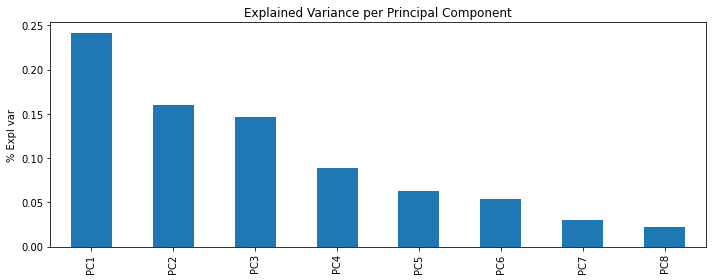

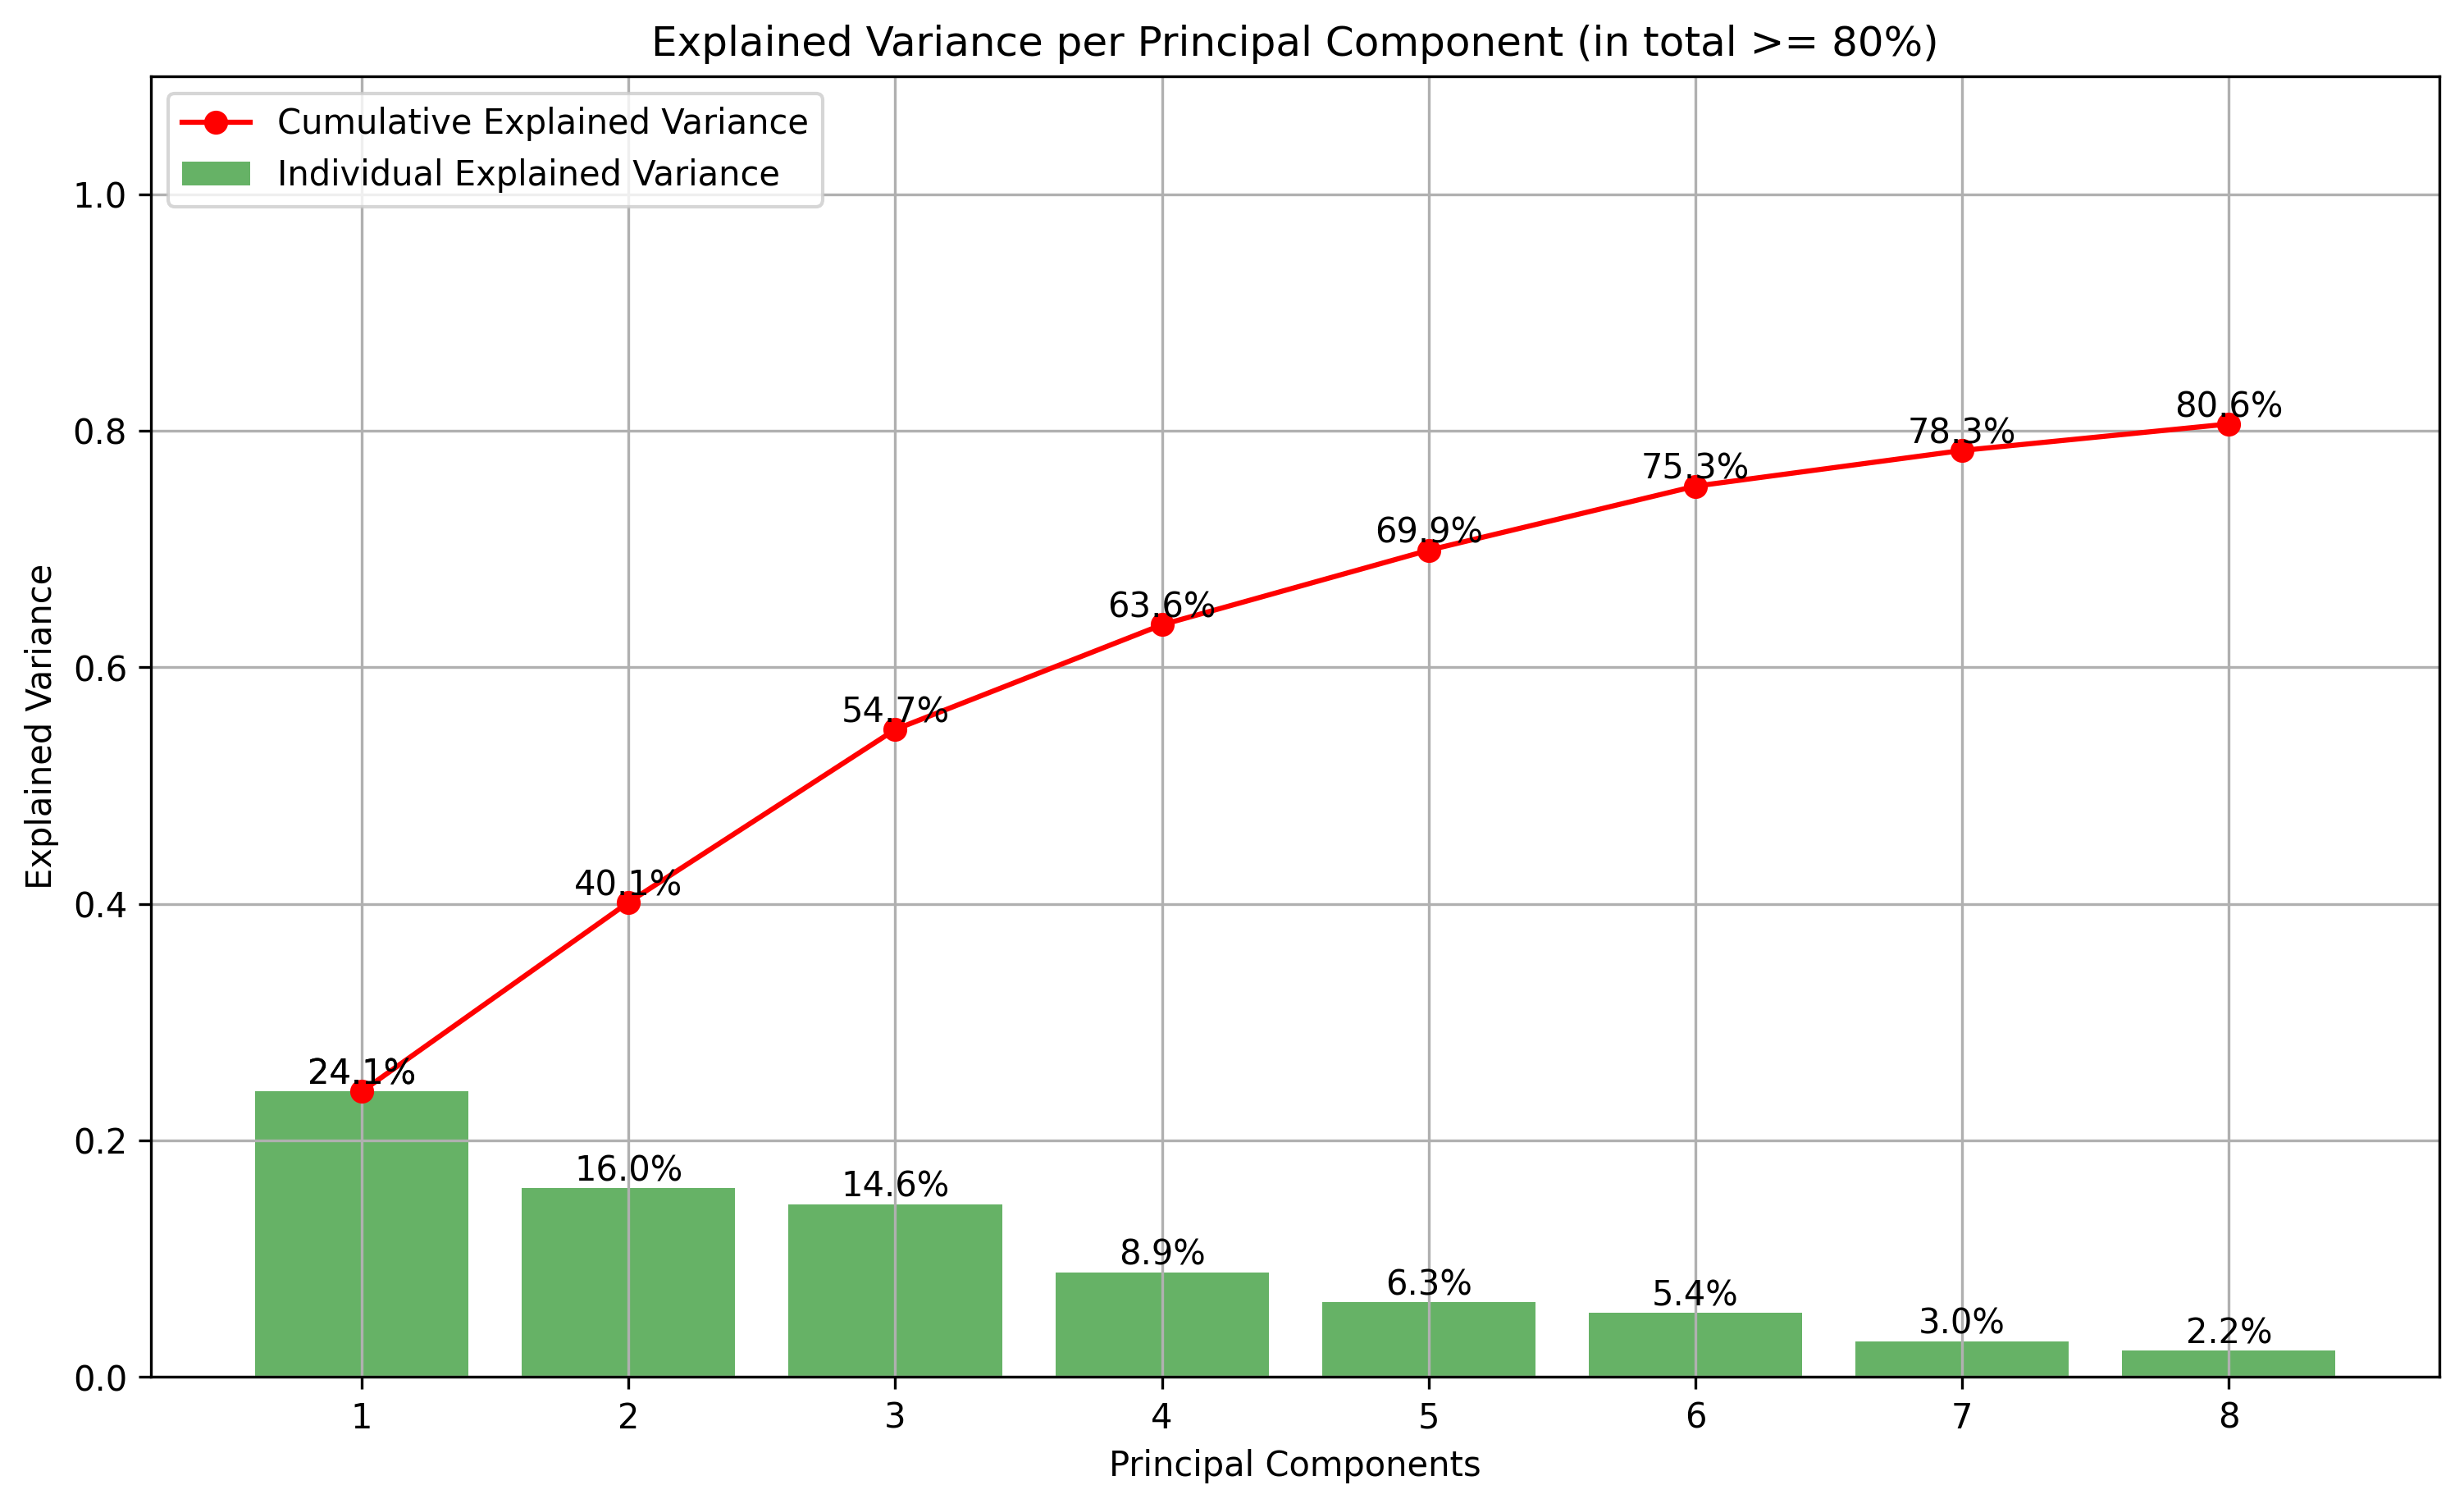

TOP 5
PC1 = ['f_Nuts_g', 'f_Oil_g', 'f_Sherry_g', 'f_Almonds_g', 'f_Fruit_g']
PC2 = ['f_Sherry_g', 'f_Peat Smoke_g', 'f_Herb_g', 'f_Fruit_g', 'f_Oak_g']
PC3 = ['f_Peat Smoke_g', 'f_Nuts_g', 'f_Maritime Notes_g', 'f_Seaweed_g', 'f_Oil_g']
PC4 = ['f_Herb_g', 'f_Fruit_g', 'f_Malt_g', 'f_Coffee_g', 'f_Dark Chocolate_g']
PC5 = ['f_Malt_g', 'f_Fruit_g', 'f_Oak_g', 'f_Sweet_g', 'f_Spices_g']
PC6 = ['f_Malt_g', 'f_Barley_g', 'f_Wheat_g', 'f_Sherry_g', 'f_Herb_g']
PC7 = ['f_Oak_g', 'f_Sweet_g', 'f_Spices_g', 'f_Vanilla_g', 'f_Caramel_g']
PC8 = ['f_Sweet_g', 'f_Chocolate_g', 'f_Vanilla_g', 'f_Caramel_g', 'f_Honey_g']


In [167]:
data_for_PCA = df_ROBUST[f_columns_g]

finish_df_pca, finish_loadings = apply_PCA(data_for_PCA,top=5)

In [83]:
PC = 8
finish_loadings.sort_values(by = f'PC{PC}', ascending=False).head(10)

index       PC1       PC2       PC3       PC4       PC5  \
1            f_Sweet_g  0.014574  0.070674  0.009103  0.064734  0.130856   
17       f_Chocolate_g  0.017328  0.048659 -0.026291  0.067357  0.027124   
19         f_Vanilla_g  0.011446  0.012578 -0.004129  0.057011  0.074085   
8          f_Caramel_g  0.006714  0.016057  0.000627  0.030991  0.051025   
9            f_Honey_g  0.010746  0.022373  0.000084  0.019384  0.052545   
12          f_Zitrus_g  0.000904  0.013139  0.007729  0.026589  0.036679   
48            f_Pear_g  0.001701  0.007713  0.001603  0.017322  0.024708   
15          f_Coffee_g  0.005375  0.034255 -0.002914  0.121014 -0.041301   
30  f_Maritime Notes_g -0.010867  0.035437  0.072660  0.013212  0.009811   
6            f_Fruit_g  0.033185  0.142611 -0.044607  0.167586  0.612342   

         PC6       PC7       PC8  
1   0.000312  0.479790  0.381860  
17  0.001654  0.204441  0.291900  
19 -0.001471  0.268934  0.230634  
8   0.007316  0.221001  0.219508  
9  -0.010449  0.113937  0.096075  
12 -0.016173  0.105534  0.029848  
48 -0.032064  0.011062  0.025181  
15  0.009367 -0.024118  0.018642  
30  0.002691  0.016037  0.017614  
6  -0.708845 -0.242541  0.017485

In [168]:
finish_PCA_names = [
    'f_Oily_nuttiness',
    'f_Dry_smokiness',
    'f_Nutty_salty_smokiness',
    'f_Dark_chocolatiness',
    'f_Malty_sweetness',
    'f_Dry_graininess',
    'f_Amber_sweetness',
    'f_Caramel_chocolatiness'
]

In [169]:
finish_df_pca.columns = finish_PCA_names

### Add all PCA solutions to DF

In [170]:
all_PCA_solutions_df = pd.concat([nosing_df_pca, tasting_df_pca, finish_df_pca], axis=1) 

In [171]:
nosing_PCA_names = list(nosing_df_pca.columns)
tasting_PCA_names = list(tasting_df_pca.columns)
finish_PCA_names = list(finish_df_pca.columns)

In [172]:
all_PCA_solutions_df.columns

Index(['n_Floral_herbiness', 'n_Sweet_nuttiness', 'n_Amber_sweetness',
       'n_Dry_smokey_graininess', 'n_Amber_sweetness',
       'n_Salty_sweet_smokiness', 'n_Citrussiness', 'n_Dry_sherriness',
       'n_Spiced_sweet_smokiness', 'n_Peppery_spiciness',
       'n_Bitter_chocolatiness', 'n_Mellow_sweetness', 't_Herby_pepperiness',
       't_Peppery_nutty_chocolatiness', 't_Herby_chocolatty_nuttiness',
       't_Sweet_oily_nuttiness', 't_Caramelly_sweetness',
       't_Smokey_chocolatiness', 't_Mellow_sweet_citrussiness',
       't_Citrussy_smokiness', 't_Smokey_mellow_caramelliness',
       't_Dry_raisiness', 't_Dry_mellow_graininess', 'f_Oily_nuttiness',
       'f_Dry_smokiness', 'f_Nutty_salty_smokiness', 'f_Dark_chocolatiness',
       'f_Malty_sweetness', 'f_Dry_graininess', 'f_Amber_sweetness',
       'f_Caramel_chocolatiness'],
      dtype='object')

In [173]:
df = pd.concat([df, all_PCA_solutions_df], axis=1)

In [174]:
df.head()

product_title  distillery         country    region   age  \
0   Glen Moray Elgin Classic  Glen Moray        Scotland  Speyside  13.0   
1         Tobermory 21 Years   Tobermory        Scotland   Islands  21.0   
2                 Cutty Sark     unknown        Scotland  Speyside  13.0   
3  Crown Royal 3 Years Black       Gimli          Canada  Speyside   3.0   
4  Gold Cock 20 Years - 1995  R. Jelinek  Czech Republic  Speyside  20.0   

    abv  bottle_size            bottler maturing  rating  nbr_of_ratings  \
0  40.0          0.7  Original bottling  Bourbon     3.4              24   
1  53.8          0.7  Original bottling  Bourbon     4.6               5   
2  40.0          0.7  Original bottling  Bourbon     3.7              10   
3  45.0          1.0  Original bottling  Bourbon     3.4               8   
4  49.2          0.7  Original bottling  Bourbon     4.0               1   

                      unique_id     filtration  colouring  whisky_type  \
0    1_Glen Moray Elgin Classic     Filtration  Colouring  Single Malt   
1          5_Tobermory 21 Years  No filtration  Colouring      Unknown   
2                 13_Cutty Sark  No filtration  Colouring      Blended   
3  15_Crown Royal 3 Years Black     Filtration  Colouring      Blended   
4  16_Gold Cock 20 Years - 1995  No filtration  Colouring      Unknown   

   f_Spices_g  f_Sweet_g  f_Malt_g  f_Pepper_g  f_Oak_g  f_Black Currant_g  \
0      0.5059     2.3293    2.0943      1.7707   0.2346             0.5536   
1      3.5041     0.4609    0.5685      0.5493   0.5075             0.0000   
2      2.8583     0.6683    0.4120      0.7964   3.3112             0.0000   
3      0.0000     0.8145    0.0000      0.0000   0.7384             0.0000   
4      0.0000     0.0000    0.0000      0.0000   0.0000             0.0000   

   f_Fruit_g  f_Ginger_g  f_Caramel_g  f_Honey_g  f_Nuts_g  f_Oil_g  \
0     0.2529      0.2647       0.2618     0.2677    0.2618   0.2647   
1     0.5493      0.0000       0.0000     0.0000    0.0000   0.0000   
2     0.0000      0.4167       0.0000     0.0000    0.0000   0.0000   
3     0.7960      0.0000       0.0000     0.0000    0.0000   0.0000   
4     0.0000      0.0000       0.0000     0.0000    0.0000   0.0000   

   f_Zitrus_g  f_Herb_g  f_Dark Chocolate_g  f_Coffee_g  f_Grape_g  \
0      0.2677    0.0000              0.0000      0.0000     0.0000   
1      2.8743    1.7052              1.1497      1.1497     0.5749   
2      0.4167    0.4120              0.0000      0.0000     0.0000   
3      0.8427    0.8332              0.0000      0.0000     0.0000   
4      0.0000    0.0000              0.0000      0.0000     0.0000   

   f_Chocolate_g  f_Peat Smoke_g  f_Vanilla_g  f_Orange_g  f_Sherry_g  \
0         0.0000          0.0000        0.000      0.0000      0.0000   
1         0.5685          0.0000        0.000      0.0000      0.0000   
2         0.0000          0.8279        0.412      0.4214      0.3758   
3         0.8238          0.0000        0.000      0.8427      0.7515   
4         0.0000          0.0000        0.000      0.0000      0.0000   

   f_Cake_g  f_Floral_g  f_Raisin_g  f_Herbs_g  f_Wheat_g  f_Chili_g  \
0    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
1    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
2    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
3    0.8427      0.8427      0.8332     0.8145        0.0        0.0   
4    0.0000      0.0000      0.0000     0.0000        0.0        0.0   

   f_Salt_g  f_Tobacco_g  f_Maritime Notes_g  f_Bonfire Smoke_g  f_Alcohol_g  \
0       0.0          0.0                 0.0                0.0          0.0   
1       0.0          0.0                 0.0                0.0          0.0   
2       0.0          0.0                 0.0                0.0          0.0   
3       0.0          0.0                 0.0                0.0          0.0   
4       0.0          0.0                 0.0                0.0    

# WHISKY CLUSTERING

## K-PROTOTYPES

In [175]:
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

### Functions

In [93]:
def create_hierarchical_clustering_KPROTO(dataframe, method):
    fig, ax = plt.subplots(figsize=(10,5), dpi=300) # when horizontal

    # Correlation matrix
    correlation_matrix = dataframe.corr()

    # Perform hierarchical clustering + choose method
    linkage_matrix = linkage(correlation_matrix, method=method)

    # Visualize the dendrogram with colored branches based on a color threshold
    color_threshold = 0.7*max(linkage_matrix[:,2]) #This is the default value
    dendrogram(linkage_matrix, labels=[item for item in correlation_matrix.columns], color_threshold=color_threshold, orientation='top')
    plt.title(f"Dendogram")
    # plt.savefig(f"{name}__{method}")
    plt.show()
    
    # Clustermap hierarchically clustered
    sns.clustermap(
    dataframe.corr().iloc[order, order],
    cmap="crest",  
    linewidths=.5,
    col_cluster=True,
    row_cluster=True,
    cbar_kws={"shrink": 0.7, "use_gridspec": False},  # Adjust color bar size
    figsize=(10,10)
)

plt.show()

In [94]:
# pip install kmodes

In [95]:
data_for_KPROTO = pd.concat([df_ROBUST[cont_features_CLUST], all_PCA_solutions_df, df[cat_features_CLUST]], axis =1)

In [96]:
len(data_for_KPROTO.columns)

56

In [97]:
data_for_KPROTO.columns

Index(['age', 'rating', 'bottle_size', 'finish_complexity',
       'nosing_complexity', 'tasting_complexity', 'nosing_rare',
       'nosing_uncommon', 'nosing_common', 'tasting_rare', 'tasting_uncommon',
       'tasting_common', 'finish_rare', 'finish_uncommon', 'finish_common',
       'n_Floral_herbiness', 'n_Sweet_nuttiness', 'n_Amber_sweetness',
       'n_Dry_smokey_graininess', 'n_Amber_sweetness',
       'n_Salty_sweet_smokiness', 'n_Citrussiness', 'n_Dry_sherriness',
       'n_Spiced_sweet_smokiness', 'n_Peppery_spiciness',
       'n_Bitter_chocolatiness', 'n_Mellow_sweetness', 't_Herby_pepperiness',
       't_Peppery_nutty_chocolatiness', 't_Herby_chocolatty_nuttiness',
       't_Sweet_oily_nuttiness', 't_Caramelly_sweetness',
       't_Smokey_chocolatiness', 't_Mellow_sweet_citrussiness',
       't_Citrussy_smokiness', 't_Smokey_mellow_caramelliness',
       't_Dry_raisiness', 't_Dry_mellow_graininess', 'f_Oily_nuttiness',
       'f_Dry_smokiness', 'f_Nutty_salty_smokiness', 'f

### Check number of clusters

In [98]:
# costs = []
# n_clusters = []
# clusters_assigned = []

# for i in list(range(3, 25)):
#     try:
#         kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
#         clusters = kproto.fit_predict(data_for_KPROTO, categorical=list(range(46, 56)))
#         costs.append(kproto.cost_)
#         n_clusters.append(i)
#         clusters_assigned.append(clusters)
#     except:
#         print(f"Can't cluster with {i} clusters")
        
# sns.scatterplot(x=n_clusters, y=costs)
# plt.show()

In [99]:
# costs = []
# n_clusters = []
# clusters_assigned = []

# for i in list(range(25, 30)):
#     try:
#         kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
#         clusters = kproto.fit_predict(data_for_KPROTO, categorical=list(range(46, 56)))
#         costs.append(kproto.cost_)
#         n_clusters.append(i)
#         clusters_assigned.append(clusters)
#     except:
#         print(f"Can't cluster with {i} clusters")
        
# sns.scatterplot(x=n_clusters, y=costs)
# plt.show()

### Perform clustering

In [100]:
kproto = KPrototypes(n_clusters=10, verbose=2)  # specify the number of clusters
clusters = kproto.fit_predict(data_for_KPROTO, categorical=list(range(46, 56)))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2929, ncost: 871470.4791904541
Run: 1, iteration: 2/100, moves: 1146, ncost: 849150.0928655331
Run: 1, iteration: 3/100, moves: 538, ncost: 843886.4733921114
Run: 1, iteration: 4/100, moves: 238, ncost: 842529.0471152617
Run: 1, iteration: 5/100, moves: 129, ncost: 842138.7654611099
Run: 1, iteration: 6/100, moves: 50, ncost: 842067.0031201327
Run: 1, iteration: 7/100, moves: 18, ncost: 842051.128438736
Run: 1, iteration: 8/100, moves: 3, ncost: 842050.1650754213
Run: 1, iteration: 9/100, moves: 2, ncost: 842049.9012304547
Run: 1, iteration: 10/100, moves: 0, ncost: 842049.9012304547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3300, ncost: 883163.2592413832
Run: 2, iteration: 2/100, moves: 1344, ncost: 865792.9907552064
Run: 2, iter

In [101]:
pd.Series(clusters).value_counts()

6    2682
7     778
3     752
5     391
2     369
1     364
0     356
4     351
8     264
9     252
Name: count, dtype: int64

In [102]:
# Print cluster labels
df['KPROTO_clusters'] = clusters

### Explore clusters

#### Numerical features

In [103]:
KPROTO_cont = df[cont_features+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T
KPROTO_cont
# .to_excel("KPROTO_cont_features.xlsx")

KPROTO_clusters             0          1          2          3          4  \
age                 15.508427  15.467033  14.699187  12.820479  14.028490   
rating               4.002247   4.015659   3.964770   4.099867   3.997151   
abv                 48.636517  48.177198  47.516531  47.927128  47.039886   
nbr_of_ratings       3.469101   3.909341   5.284553  73.990691   8.603989   
bottle_size          0.688202   0.695027   0.681247   0.617593   0.682664   
finish_complexity    4.542135   4.079670   4.506775  16.736702   6.601140   
nosing_complexity    7.589888   8.450549   8.441734  19.878989   9.433048   
tasting_complexity   9.103933   7.840659   8.059621  22.344415  11.515670   
nosing_rare          0.834270   0.686813   1.059621   3.974734   0.905983   
nosing_uncommon      4.983146   6.071429   5.764228  13.563830   6.504274   
nosing_common        1.772472   1.692308   1.617886   2.340426   2.022792   
tasting_rare         0.581461   0.494505   0.720867   3.757979   0.726496   
tasting_uncommon     5.870787   5.156593   5.181572  15.309840   7.988604   
tasting_common       2.651685   2.189560   2.157182   3.276596   2.800570   
finish_rare          0.685393   0.642857   0.769648   5.324468   1.071225   
finish_uncommon      2.988764   2.598901   2.956640   9.812500   4.347578   
finish_common        0.867978   0.837912   0.780488   1.599734   1.182336   

KPROTO_clusters             5          6           7          8          9  
age                 16.306905  13.718121   13.600257  16.469697  15.678571  
rating               4.202302   3.927964    4.064910   4.011742   4.062302  
abv                 49.725064  47.258054   45.641131  47.704167  47.219444  
nbr_of_ratings       5.025575   7.697614  100.305913   2.363636   4.456349  
bottle_size          0.682813   0.669845    0.575990   0.696136   0.697857  
finish_complexity    5.043478   5.288218   25.025707   5.492424   4.246032  
nosing_complexity    8.375959   7.872856   29.848329   6.310606   6.575397  
tasting_complexity  11.023018   9.154735   33.507712   7.477273   8.888889  
nosing_rare          0.838875   0.762118    5.735219   0.590909   0.833333  
nosing_uncommon      5.652174   5.246458   21.182519   4.098485   4.277778  
nosing_common        1.884910   1.864280    2.930591   1.621212   1.464286  
tasting_rare         0.618926   0.685309    5.217224   0.530303   0.944444  
tasting_uncommon     7.693095   6.024236   24.365039   4.859848   5.988095  
tasting_common       2.710997   2.445190    3.925450   2.087121   1.956349  
finish_rare          0.785166   0.881805    8.047558   0.681818   0.912698  
finish_uncommon      3.286445   3.389262   15.010283   4.003788   2.603175  
finish_common        0.971867   1.017151    1.967866   0.806818   0.730159

In [104]:
# order_KPROTO_cont = [3,0,5,7,4,2,1,6]
# order_KPROTO_cont = [  10,7,8,  11,2, 4,5,16,17,18,19,12,14,0,6,9,3,1,13,15]
order_KPROTO_cont = [0,8, 7,4,1,5,3,9,2,6]

<AxesSubplot: xlabel='KPROTO_clusters', ylabel='KPROTO_clusters'>

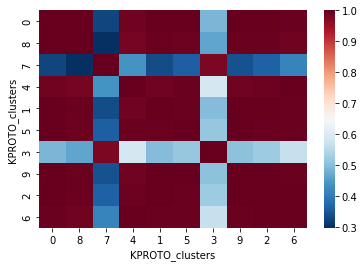

In [105]:
sns.heatmap(KPROTO_cont[order_KPROTO_cont].corr(), cmap='RdBu_r')

In [ ]:
create_hierarchical_clustering_KPROTO(KPROTO_cont,'complete')

#### Categorical features

In [ ]:
KPROTO_cat = df[cat_features_CLUST+['KPROTO_clusters']].groupby('KPROTO_clusters').agg(pd.Series.mode).T
KPROTO_cat
# .to_excel("KPROTO_cat_features.xlsx")

In [ ]:
list_of_PCA = list(all_PCA_solutions_df.columns)

In [ ]:
KPROTO_PCA = df[list_of_PCA+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T
KPROTO_PCA
# .to_excel("KPROTO_PCA_features.xlsx")

#### PCA features

In [ ]:
# order_KPROTO_PCA = [0,2, 3,1, 7,6, 5,8, 4,9]
order_KPROTO_PCA = [8,0,6,2,5,1,9,3,7,4]

In [ ]:
sns.heatmap(KPROTO_PCA[order_KPROTO_PCA].corr(), cmap='RdBu_r')

In [ ]:
create_hierarchical_clustering_KPROTO(KPROTO_PCA,'complete')

In [ ]:
KPROTO_PCA_nosing = df[nosing_PCA_names+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T
KPROTO_PCA_nosing[order_KPROTO_PCA]

create_hierarchical_clustering_KPROTO(KPROTO_PCA_nosing,'complete')

In [ ]:
KPROTO_PCA_tasting = df[tasting_PCA_names+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T

create_hierarchical_clustering_KPROTO(KPROTO_PCA_tasting,'complete')

In [ ]:
KPROTO_PCA_finish = df[finish_PCA_names+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T

create_hierarchical_clustering_KPROTO(KPROTO_PCA_finish,'complete')

In [ ]:
KPROTO_PCA_cont_features = df[cont_features+['KPROTO_clusters']].groupby('KPROTO_clusters').agg('mean').T

create_hierarchical_clustering_KPROTO(KPROTO_PCA_cont_features,'complete')

#### All numerical features

In [ ]:
KPROTO_all_cont = pd.concat([KPROTO_cont,KPROTO_PCA],axis=0)
KPROTO_all_cont.sort_values(by=2,ascending=False)

In [ ]:
# order = [0,8, 1,2,3,4,5,6,7,9]
order = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
KPROTO_all_cont[order].corr()

In [ ]:
sns.heatmap(KPROTO_all_cont[order].corr(), cmap='RdBu_r')

In [ ]:
create_hierarchical_clustering_KPROTO(KPROTO_all_cont,'complete')

In [107]:
df.head()

product_title  distillery         country    region   age  \
0   Glen Moray Elgin Classic  Glen Moray        Scotland  Speyside  13.0   
1         Tobermory 21 Years   Tobermory        Scotland   Islands  21.0   
2                 Cutty Sark     unknown        Scotland  Speyside  13.0   
3  Crown Royal 3 Years Black       Gimli          Canada  Speyside   3.0   
4  Gold Cock 20 Years - 1995  R. Jelinek  Czech Republic  Speyside  20.0   

    abv  bottle_size            bottler maturing  rating  nbr_of_ratings  \
0  40.0          0.7  Original bottling  Bourbon     3.4              24   
1  53.8          0.7  Original bottling  Bourbon     4.6               5   
2  40.0          0.7  Original bottling  Bourbon     3.7              10   
3  45.0          1.0  Original bottling  Bourbon     3.4               8   
4  49.2          0.7  Original bottling  Bourbon     4.0               1   

                      unique_id     filtration  colouring  whisky_type  \
0    1_Glen Moray Elgin Classic     Filtration  Colouring  Single Malt   
1          5_Tobermory 21 Years  No filtration  Colouring      Unknown   
2                 13_Cutty Sark  No filtration  Colouring      Blended   
3  15_Crown Royal 3 Years Black     Filtration  Colouring      Blended   
4  16_Gold Cock 20 Years - 1995  No filtration  Colouring      Unknown   

   f_Spices_g  f_Sweet_g  f_Malt_g  f_Pepper_g  f_Oak_g  f_Black Currant_g  \
0      0.5059     2.3293    2.0943      1.7707   0.2346             0.5536   
1      3.5041     0.4609    0.5685      0.5493   0.5075             0.0000   
2      2.8583     0.6683    0.4120      0.7964   3.3112             0.0000   
3      0.0000     0.8145    0.0000      0.0000   0.7384             0.0000   
4      0.0000     0.0000    0.0000      0.0000   0.0000             0.0000   

   f_Fruit_g  f_Ginger_g  f_Caramel_g  f_Honey_g  f_Nuts_g  f_Oil_g  \
0     0.2529      0.2647       0.2618     0.2677    0.2618   0.2647   
1     0.5493      0.0000       0.0000     0.0000    0.0000   0.0000   
2     0.0000      0.4167       0.0000     0.0000    0.0000   0.0000   
3     0.7960      0.0000       0.0000     0.0000    0.0000   0.0000   
4     0.0000      0.0000       0.0000     0.0000    0.0000   0.0000   

   f_Zitrus_g  f_Herb_g  f_Dark Chocolate_g  f_Coffee_g  f_Grape_g  \
0      0.2677    0.0000              0.0000      0.0000     0.0000   
1      2.8743    1.7052              1.1497      1.1497     0.5749   
2      0.4167    0.4120              0.0000      0.0000     0.0000   
3      0.8427    0.8332              0.0000      0.0000     0.0000   
4      0.0000    0.0000              0.0000      0.0000     0.0000   

   f_Chocolate_g  f_Peat Smoke_g  f_Vanilla_g  f_Orange_g  f_Sherry_g  \
0         0.0000          0.0000        0.000      0.0000      0.0000   
1         0.5685          0.0000        0.000      0.0000      0.0000   
2         0.0000          0.8279        0.412      0.4214      0.3758   
3         0.8238          0.0000        0.000      0.8427      0.7515   
4         0.0000          0.0000        0.000      0.0000      0.0000   

   f_Cake_g  f_Floral_g  f_Raisin_g  f_Herbs_g  f_Wheat_g  f_Chili_g  \
0    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
1    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
2    0.0000      0.0000      0.0000     0.0000        0.0        0.0   
3    0.8427      0.8427      0.8332     0.8145        0.0        0.0   
4    0.0000      0.0000      0.0000     0.0000        0.0        0.0   

   f_Salt_g  f_Tobacco_g  f_Maritime Notes_g  f_Bonfire Smoke_g  f_Alcohol_g  \
0       0.0          0.0                 0.0                0.0          0.0   
1       0.0          0.0                 0.0                0.0          0.0   
2       0.0          0.0                 0.0                0.0          0.0   
3       0.0          0.0                 0.0                0.0          0.0   
4       0.0          0.0                 0.0                0.0    

In [108]:
df.to_csv('DATA_AFTER_UNSUPERVISED.csv')

## DBSCAN

In [487]:
# data_for_DBSCAN = pd.concat([df_YEO_ROBUST, cat_features_CLUST_OHE_df], axis = 1)
data_for_DBSCAN = pd.concat([cat_features_CLUST_OHE_df, df_ROBUST.drop(flavor_ratings_ALL, axis=1), all_PCA_solutions_df], axis=1)

In [255]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as shs
import itertools

### Gridsearch

In [488]:
# Create different values for epsilon and min_samples
# epsilon = np.arange(0.5,15,step=0.5)
# min_samples = np.arange(2,25,step=2)

epsilon = np.arange(5,15,step=0.5)
min_samples = np.arange(10,50,step=2)

In [489]:
# Count how many combinations this gives
combinations = list(itertools.product(epsilon,min_samples))
N = len(combinations)
N

400

In [490]:
def Gridsearch(combinations,X):
    scores = []
    all_label = []
    
    for i, (eps,num_samples) in enumerate(combinations):
        dbscan_model = DBSCAN(eps=eps,min_samples=num_samples).fit(X)
        labels = dbscan_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -=1
        if (num_clusters<5) or (num_clusters>15):
            scores.append(-20)
            all_label.append("Poor")
            # print("POOR: ",round(i,2),"eps = ",round(eps,2),"min_sample = ",num_samples,"# clusters = ",num_clusters,"moving on ...")
            continue
        scores.append(shs(X,labels))
        all_label.append(labels)
        # print("GOOD: ",round(i,2),"eps = ",round(eps,2),"min_sample = ",num_samples,"score = ",round(scores[-1],2),"# clusters = ",num_clusters)
        print("eps = ",round(eps,2),"| min_sample = ",num_samples,"| score = ",round(scores[-1],2),"| clusters = ",num_clusters)
    
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_label[best_index]
    best_score = scores[best_index]
    
    return {
        'best_epsilon': best_parameters[0],
        'best_min_samples': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_score
    }

In [491]:
best_para = Gridsearch(combinations, data_for_DBSCAN)

eps =  5.0 | min_sample =  10 | score =  -0.29 | clusters =  12
eps =  5.0 | min_sample =  12 | score =  -0.23 | clusters =  5
eps =  5.5 | min_sample =  10 | score =  -0.26 | clusters =  14
eps =  5.5 | min_sample =  12 | score =  -0.25 | clusters =  10
eps =  5.5 | min_sample =  14 | score =  -0.22 | clusters =  7
eps =  5.5 | min_sample =  16 | score =  -0.22 | clusters =  5
eps =  6.0 | min_sample =  10 | score =  -0.22 | clusters =  14
eps =  6.0 | min_sample =  12 | score =  -0.2 | clusters =  9
eps =  6.0 | min_sample =  14 | score =  -0.19 | clusters =  7
eps =  6.0 | min_sample =  16 | score =  -0.18 | clusters =  5
eps =  6.0 | min_sample =  18 | score =  -0.19 | clusters =  5
eps =  6.0 | min_sample =  20 | score =  -0.2 | clusters =  5
eps =  6.5 | min_sample =  10 | score =  -0.18 | clusters =  12
eps =  6.5 | min_sample =  12 | score =  -0.16 | clusters =  11
eps =  6.5 | min_sample =  14 | score =  -0.17 | clusters =  9
eps =  6.5 | min_sample =  16 | score =  -0.2 | clu

In [420]:
print(best_para)

{'best_epsilon': 14.5, 'best_min_samples': 6, 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'best_score': 0.30442419000437815}


In [421]:
df_dbscan = pd.DataFrame()
df_dbscan['cluster'] = best_para['best_labels']
df_dbscan['cluster'].value_counts()

cluster
 0    6328
-1     225
 1       6
Name: count, dtype: int64

### Final solution

In [496]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=7.5, min_samples=16).fit(data_for_DBSCAN)  # You can adjust 'eps' and 'min_samples' based on your data

# Fit the model and obtain cluster labels
labels = dbscan.labels_

# Create a DataFrame to store the cluster labels
cluster_df = pd.DataFrame({'cluster': labels})

# See how many samples are in the clusters (-1 = outliers)
cluster_df['cluster'].value_counts().sort_index()

cluster
-1    3535
 0    2856
 1      26
 2      39
 3      52
 4      20
 5      15
 6      16
Name: count, dtype: int64

In [497]:
# Silhouette score
shs(data_for_DBSCAN,cluster_df['cluster'])

-0.07306270484093845